In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns; sns.set()
matplotlib.rcParams['agg.path.chunksize'] = 10000
import os
from pathlib import Path

In [2]:
p = Path('./production-run-911')
runs= [path for path in p.iterdir() if path.parts[-1].startswith('r')]
participants={}


for run in runs:
    i=run.parts[-1][:5]
    if i in participants:
        participants[i].append(run)
    else:
        participants[i]=[run]

In [3]:
ls=[]
for run in runs:
    i=bin(int(run.parts[-1][1:-4]))
    participant=run.parts[-1][0:5]
    ls.append({'id':participant, 'perspective': int(i[-2:],2), 'speed':int(i[-4:-2],2), 'path': run, 'order': int(i[-6:-4],2)})

#     ls.append({'id': i[]})

# ls.sort()
# for i in ls:
#     print(str(i)[:7], bin(int(i)))

runsDF=pd.DataFrame(ls)
runsDF.sort_values('id', inplace=True)
runsDF['id_val']=runsDF['id'].str.extract('(\d+)', expand=False)

[l['path'] for l in ls]

[PosixPath('production-run-911/r59938733.csv'),
 PosixPath('production-run-911/r45875171.csv'),
 PosixPath('production-run-911/r18559809.csv'),
 PosixPath('production-run-911/r57560125.csv'),
 PosixPath('production-run-911/r18559821.csv'),
 PosixPath('production-run-911/r63565823.csv'),
 PosixPath('production-run-911/r11135747.csv'),
 PosixPath('production-run-911/r11135745.csv'),
 PosixPath('production-run-911/r63565821.csv'),
 PosixPath('production-run-911/r54067059.csv'),
 PosixPath('production-run-911/r58145139.csv'),
 PosixPath('production-run-911/r63565809.csv'),
 PosixPath('production-run-911/r24834595.csv'),
 PosixPath('production-run-911/r31701395.csv'),
 PosixPath('production-run-911/r18559823.csv'),
 PosixPath('production-run-911/r57560127.csv'),
 PosixPath('production-run-911/r59938735.csv'),
 PosixPath('production-run-911/r59938721.csv'),
 PosixPath('production-run-911/r53483377.csv'),
 PosixPath('production-run-911/r53483389.csv'),
 PosixPath('production-run-911/r53428687

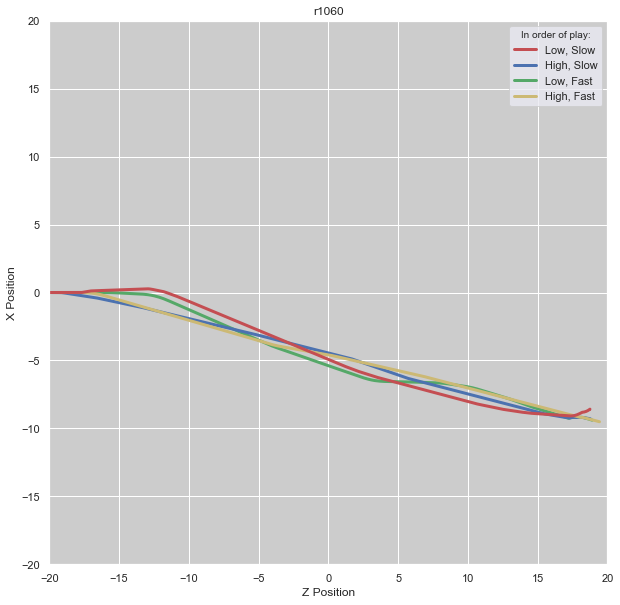

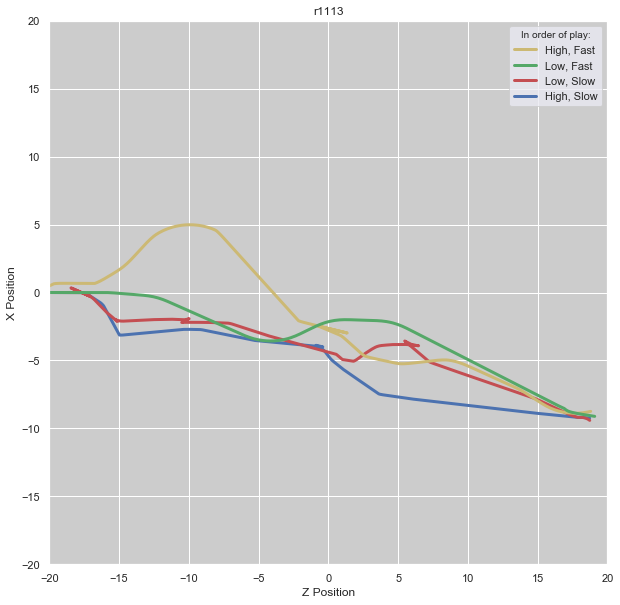

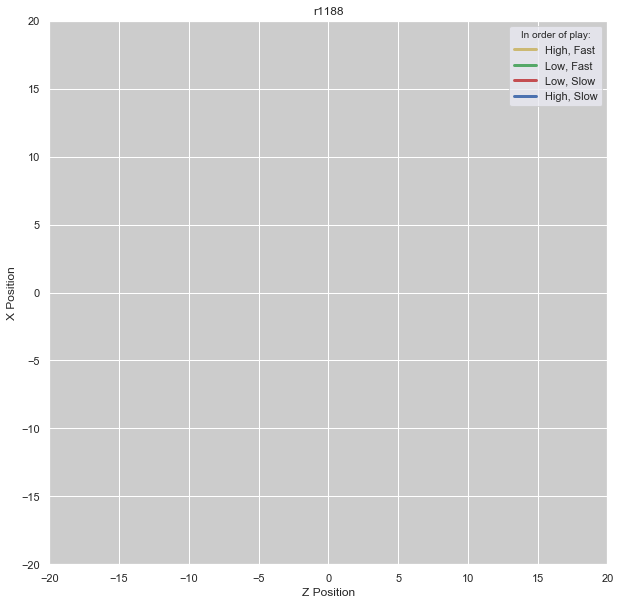

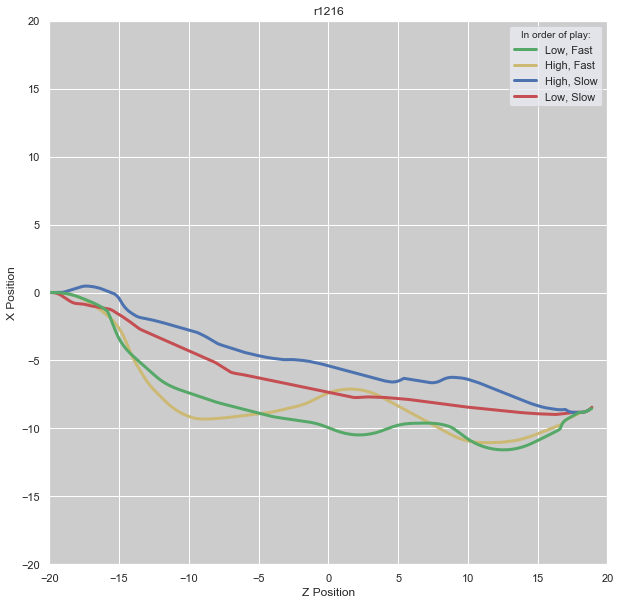

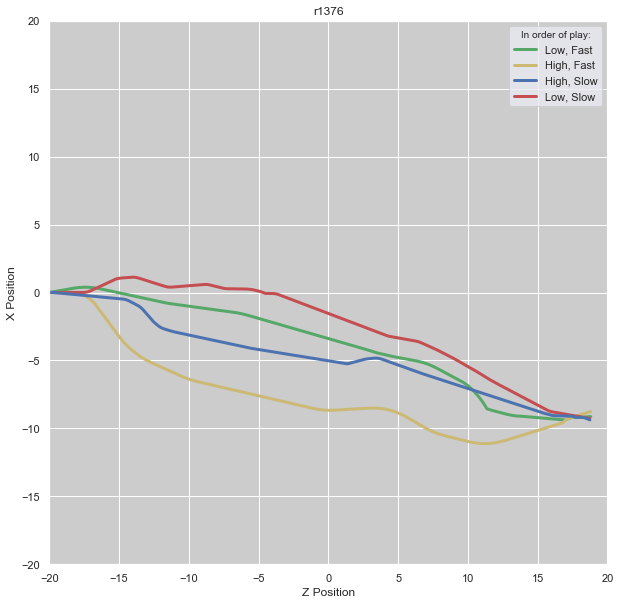

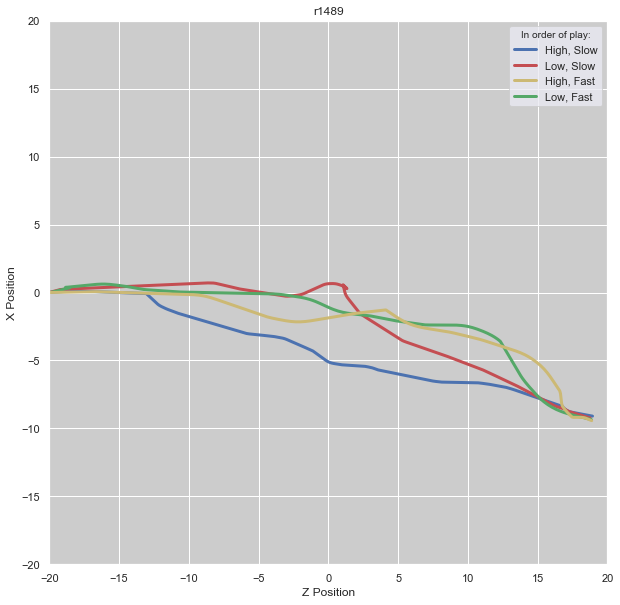

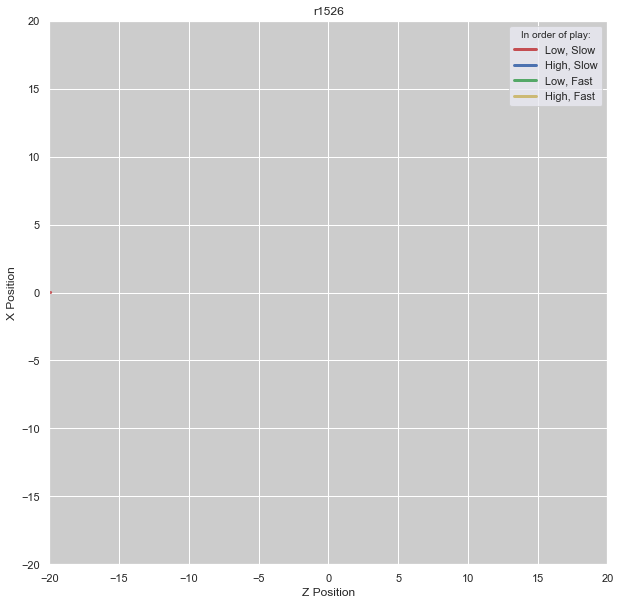

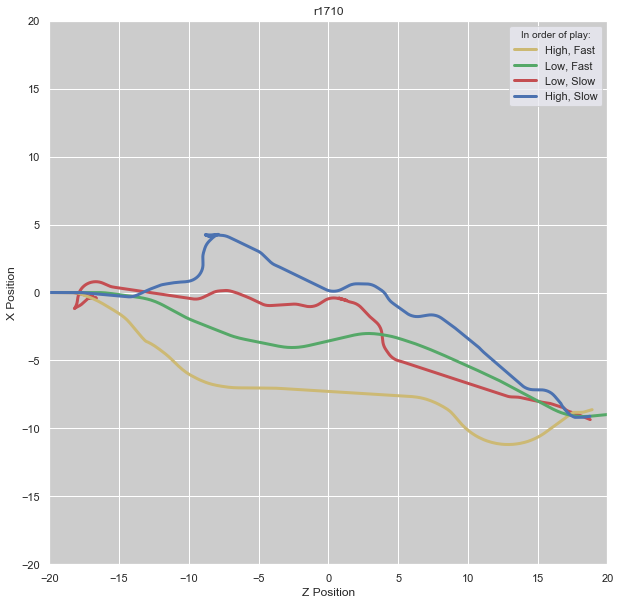

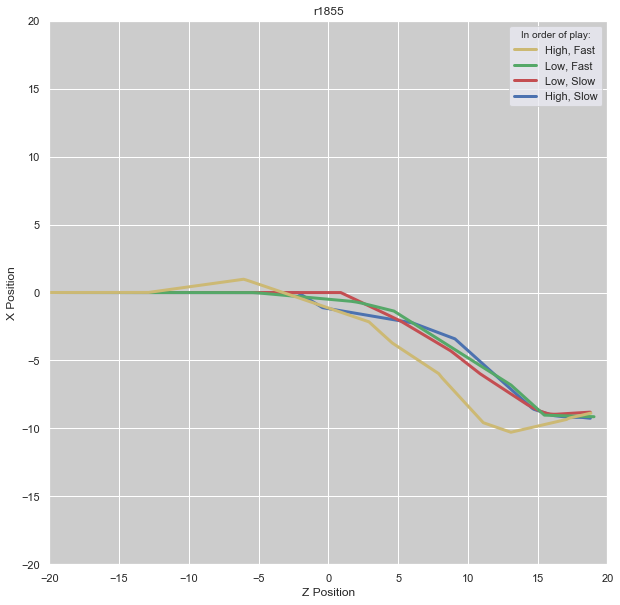

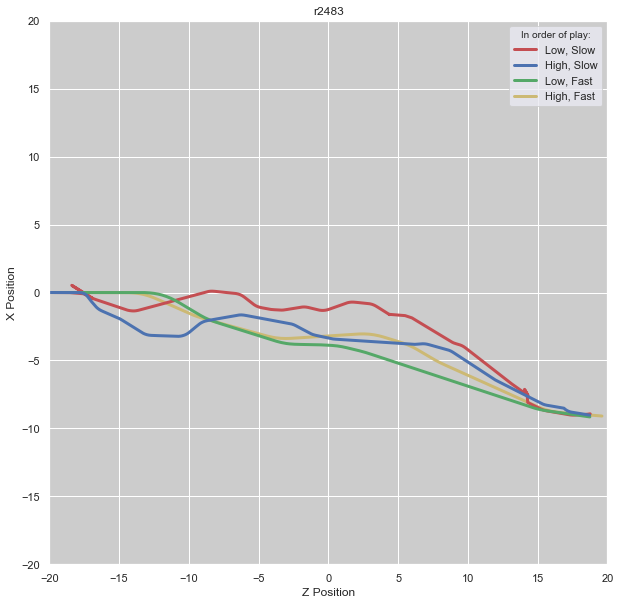

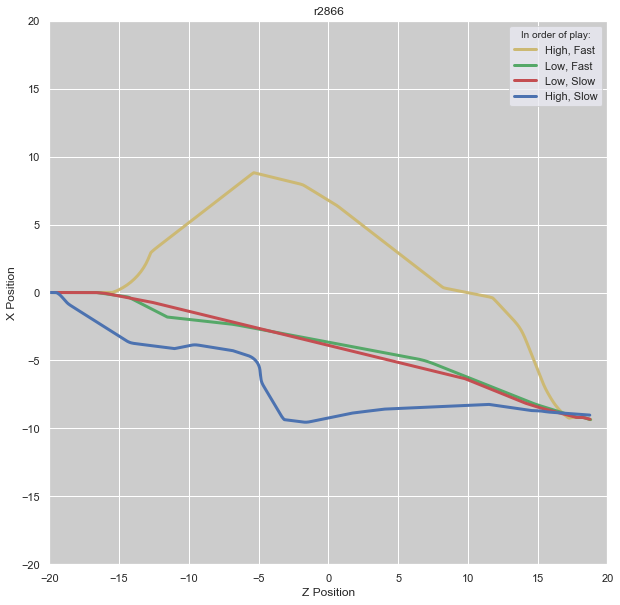

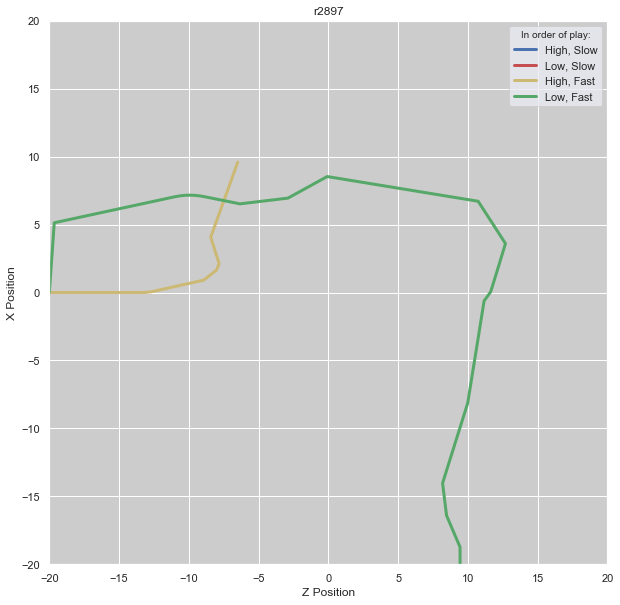

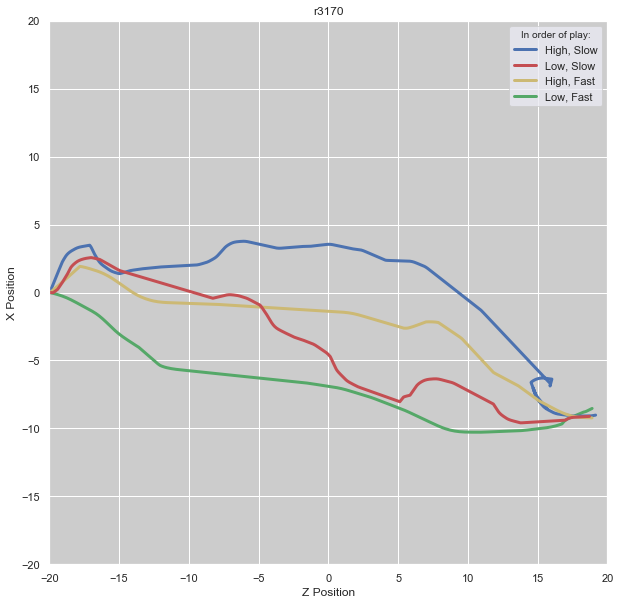

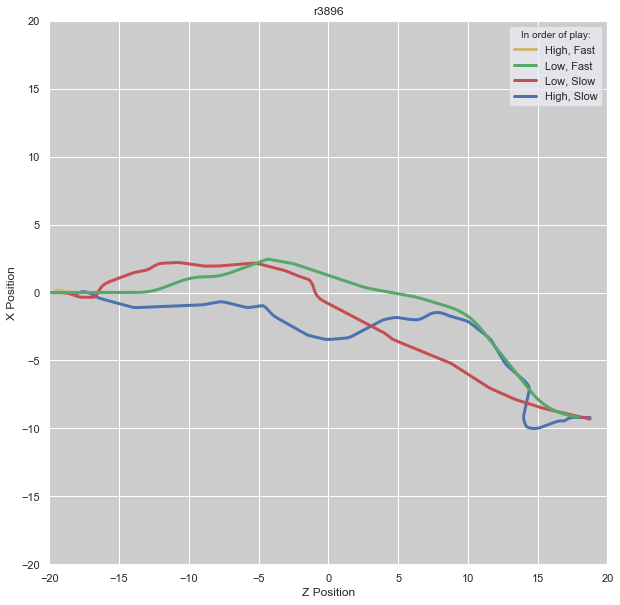

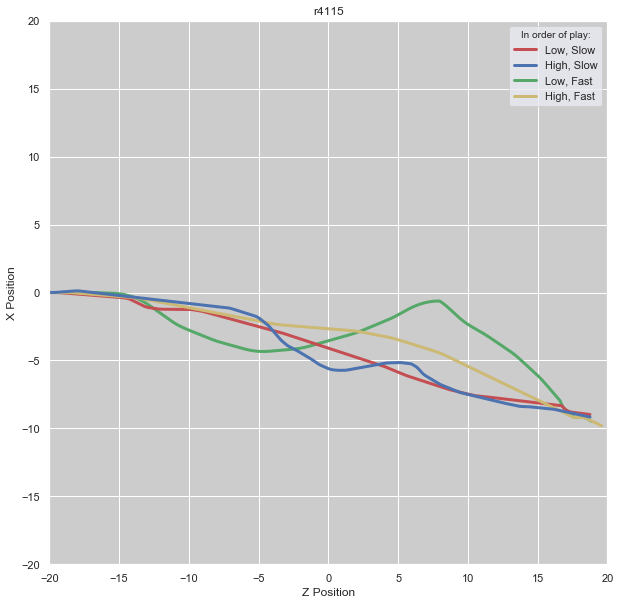

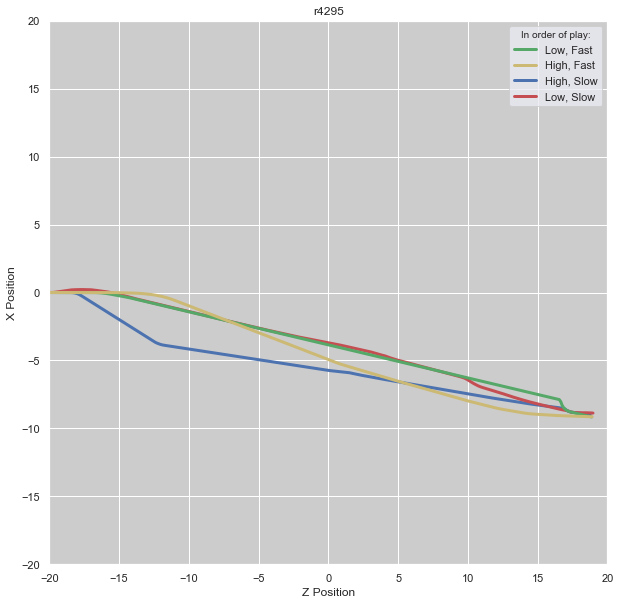

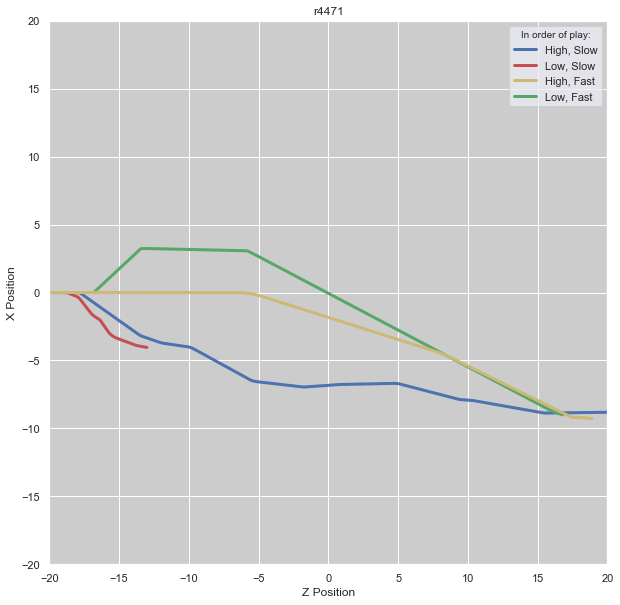

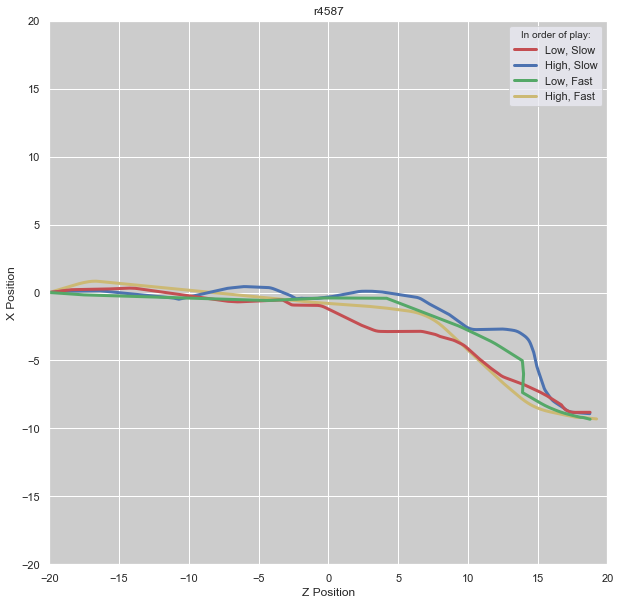

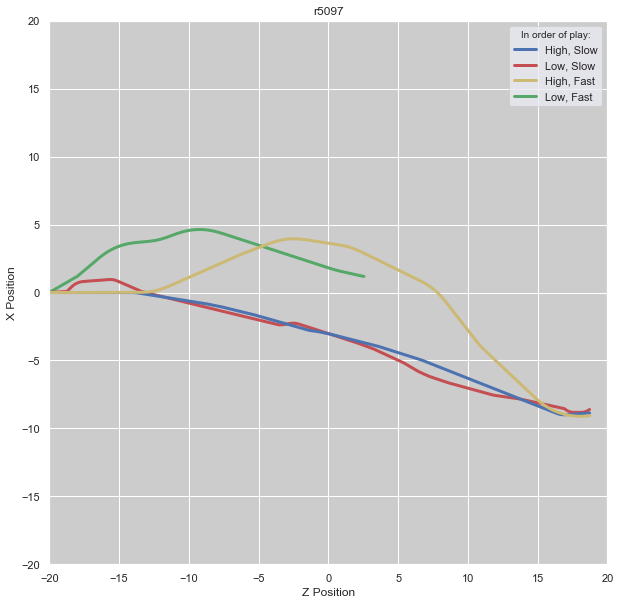

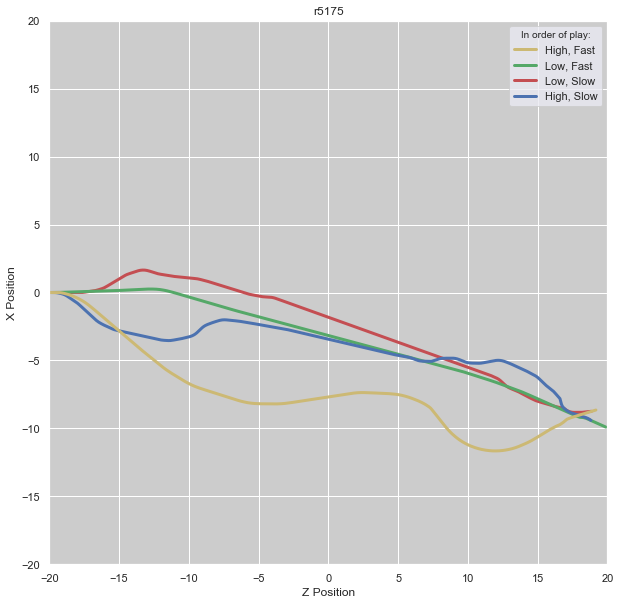

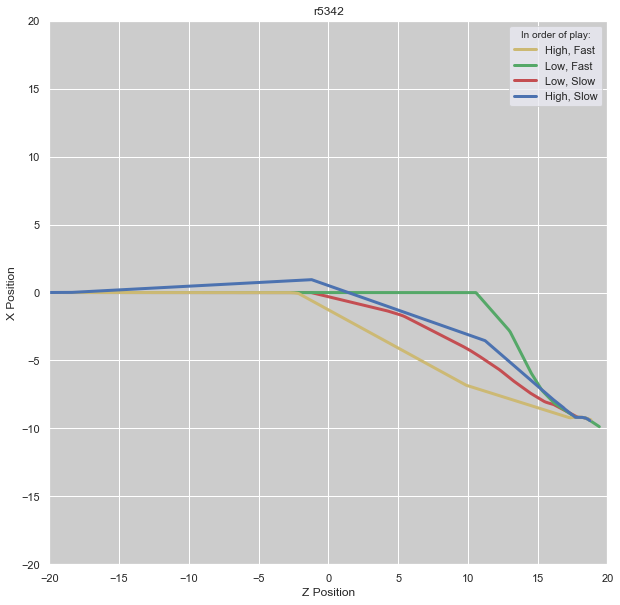

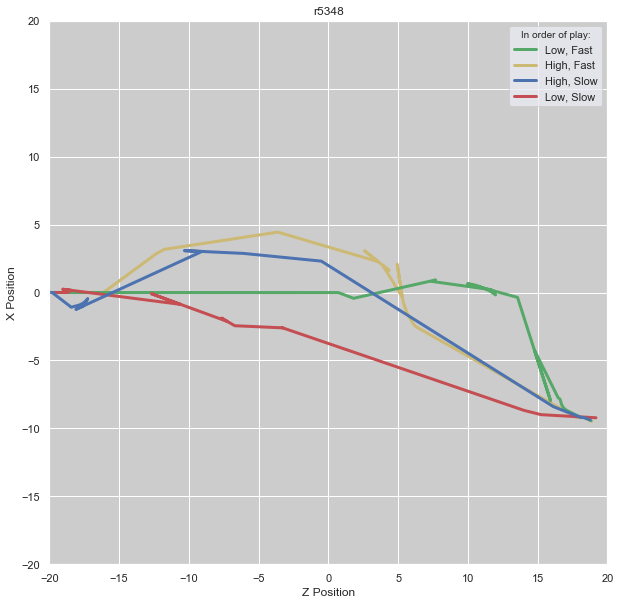

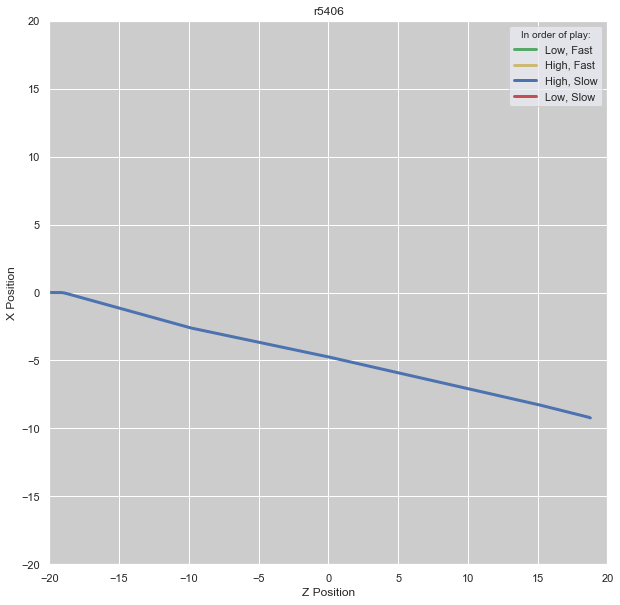

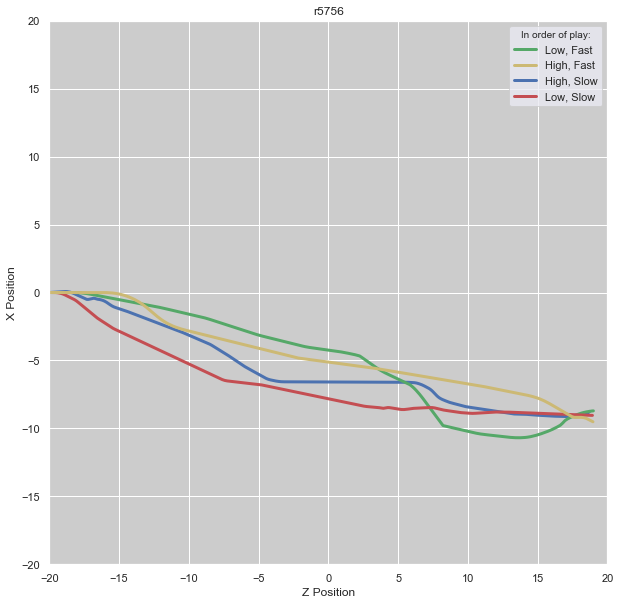

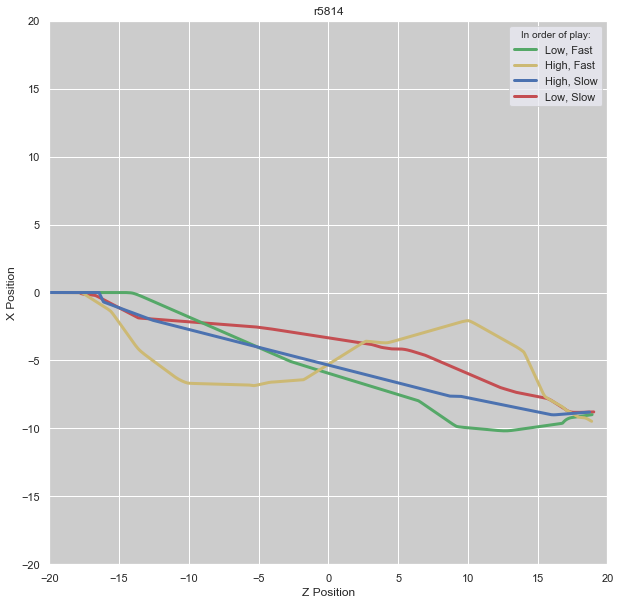

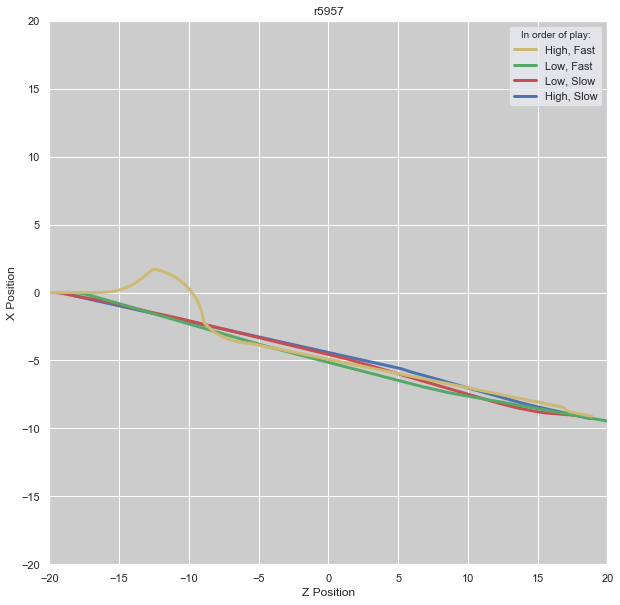

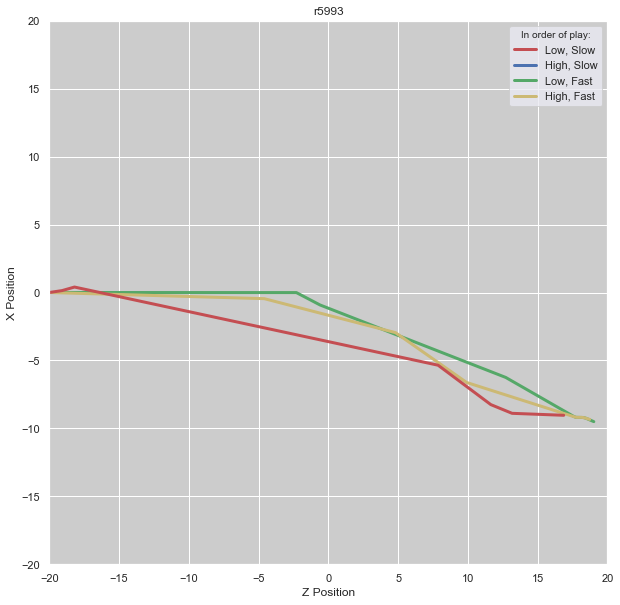

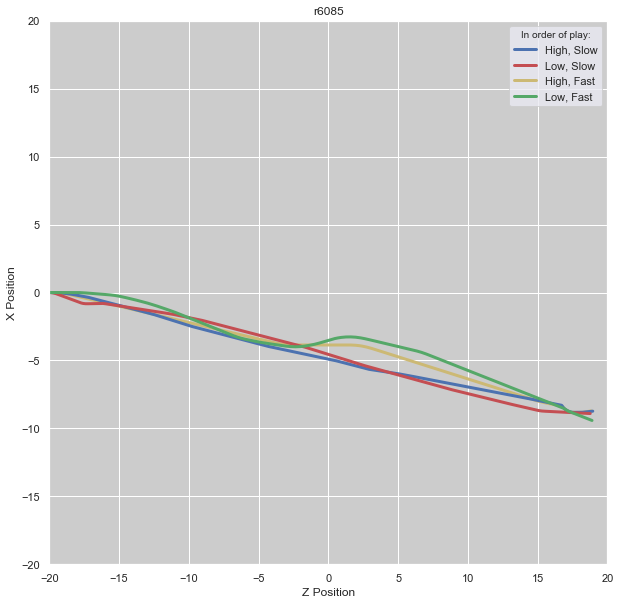

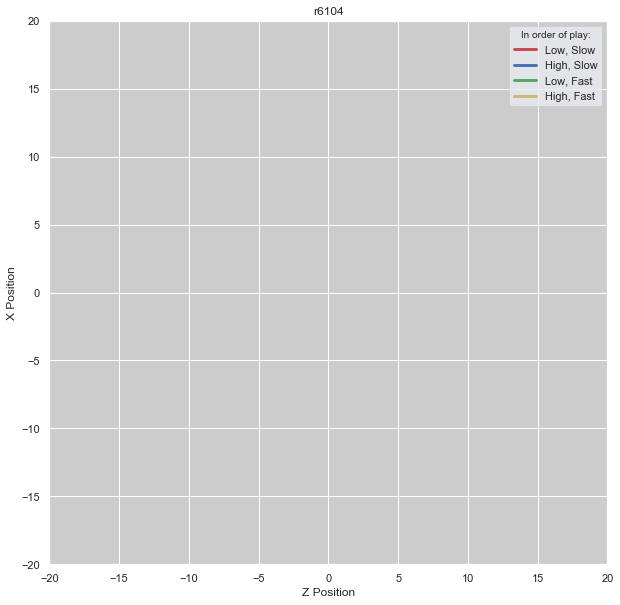

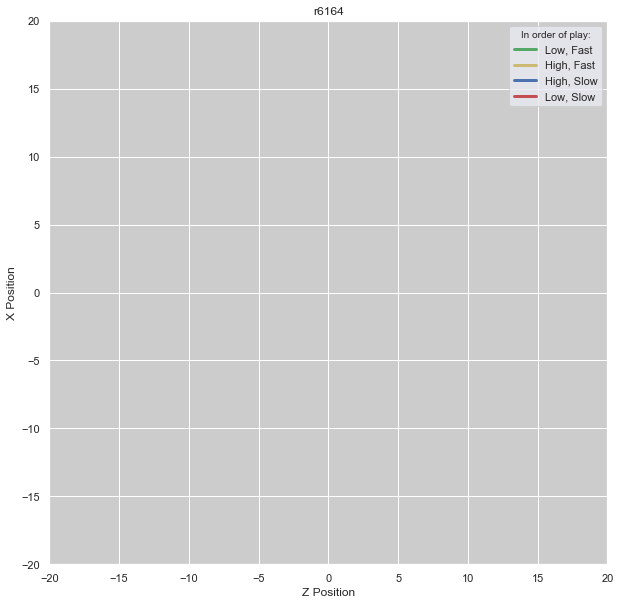

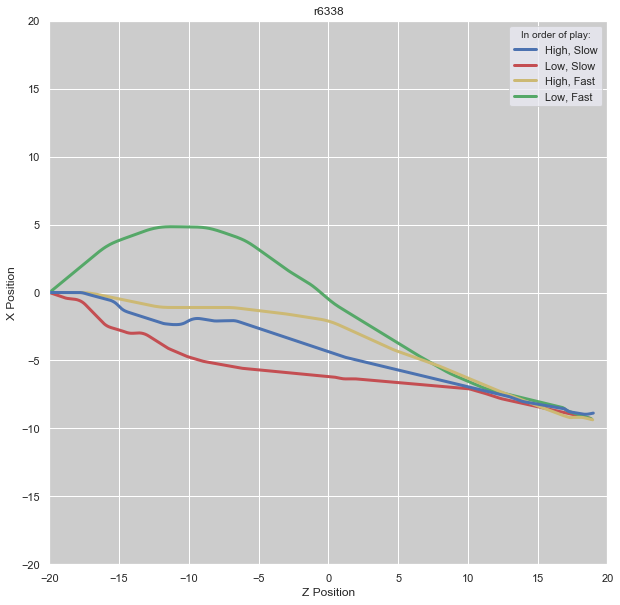

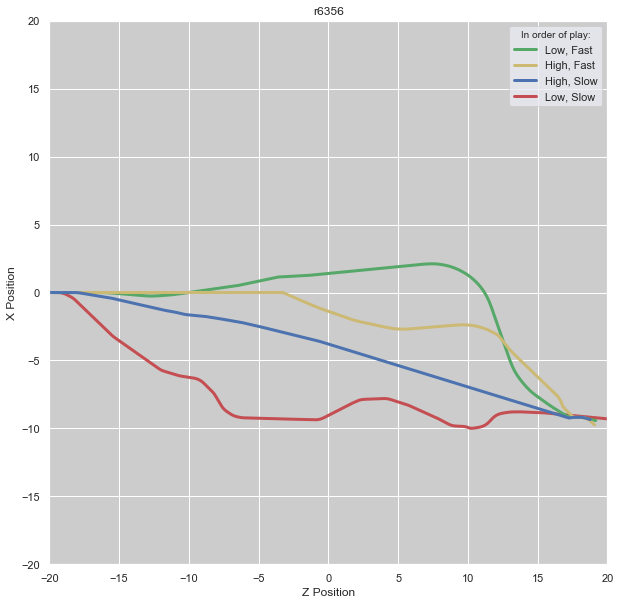

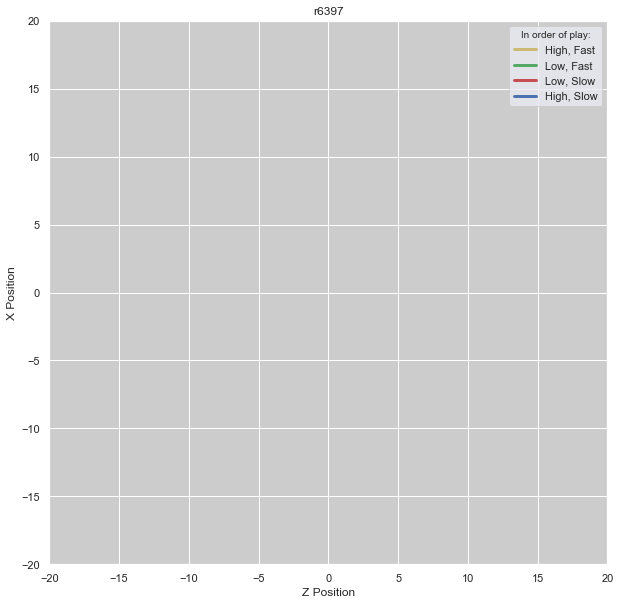

In [4]:
colors={(1,0) :'r-', (1,3) : 'g-', (3,0) : 'b-', (3,3) : 'y-'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]
legend_elements = np.array([Line2D([0], [0], color='r', lw=3, label='Low, Slow'),\
                       Line2D([0], [0], color='g', lw=3, label='Low, Fast'),\
                       Line2D([0], [0], color='b', lw=3, label='High, Slow'),\
                       Line2D([0], [0], color='y', lw=3, label='High, Fast')])
for part in runsDF.id.unique():
    paths=runsDF[runsDF['id']==part]
    title=part
    order= runsDF[runsDF['id']==part]['order'].iloc[0]
    fig, ax = plt.subplots()
    ax.set_facecolor("#CCCCCC")
    ax.set_title(title)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.set_xlabel("Z Position")
    ax.set_ylabel("X Position")
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])
    legend = list(legend_elements[orders[order]])
    ax.legend(handles=legend, loc='upper right', title='In order of play:')
    for path in paths.iterrows():
#         print("reading from", path[1]['path'])
        condition=(path[1]['perspective'],path[1]['speed'])
        data=pd.read_csv(path[1]['path'])
        data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
        i=0
        ax.plot(data[data['i']==i]['pz'], data[data['i']==i]['px'], colors[condition], lw=3)
#     plt.savefig('./player_figs/'+str(title)+'.png')
    plt.show()

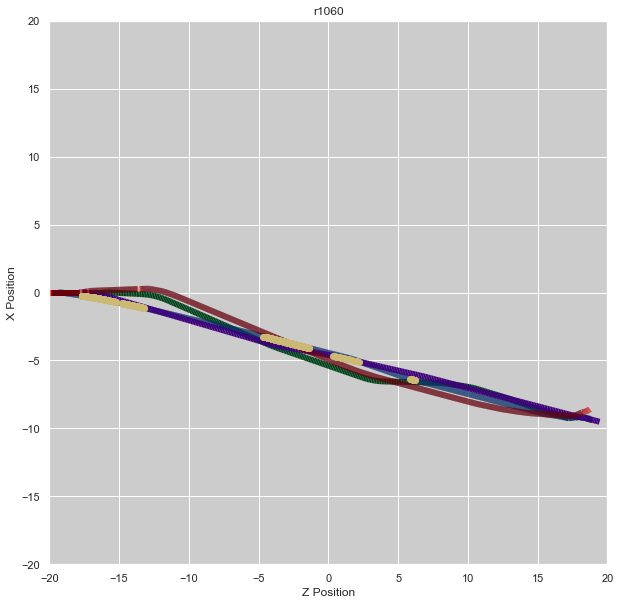

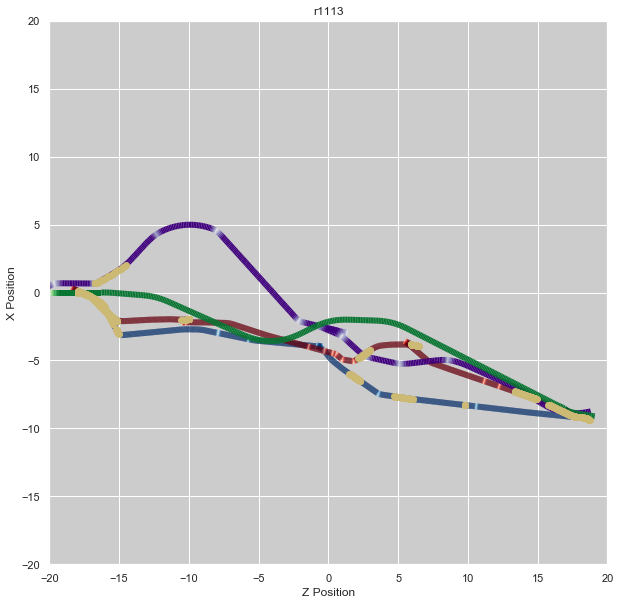

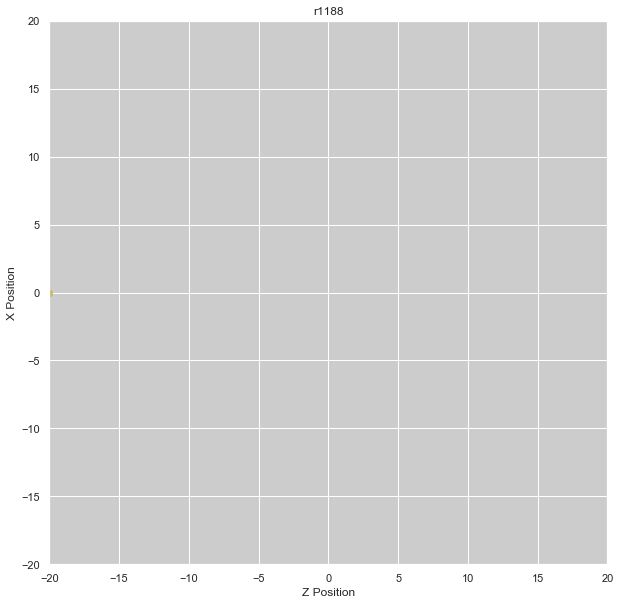

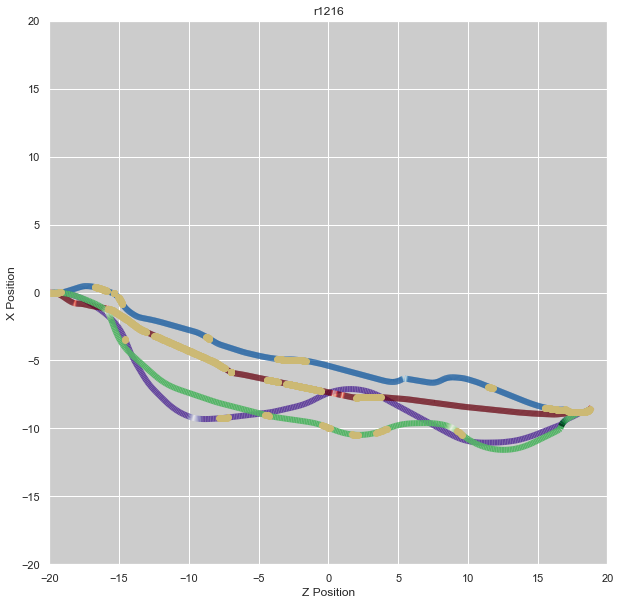

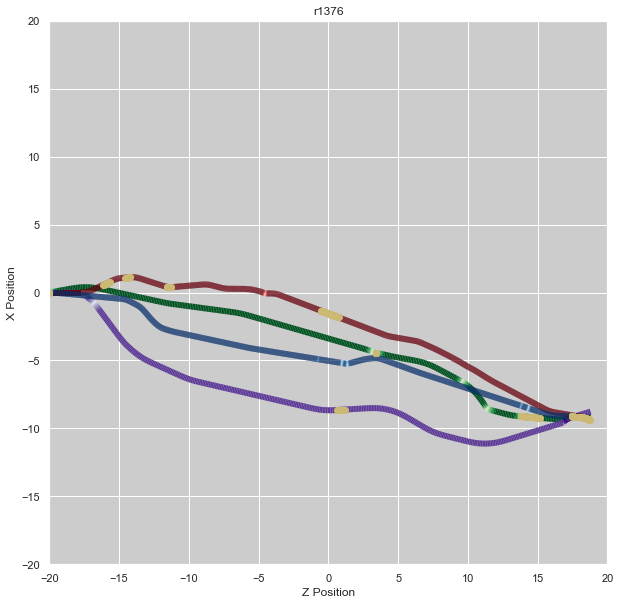

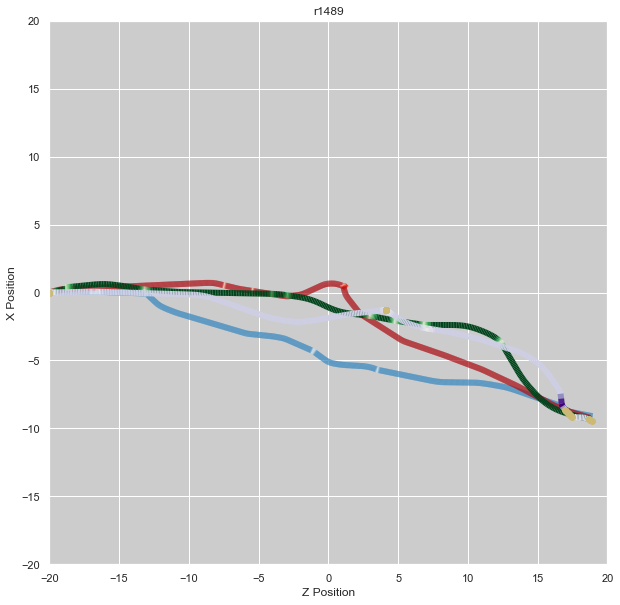

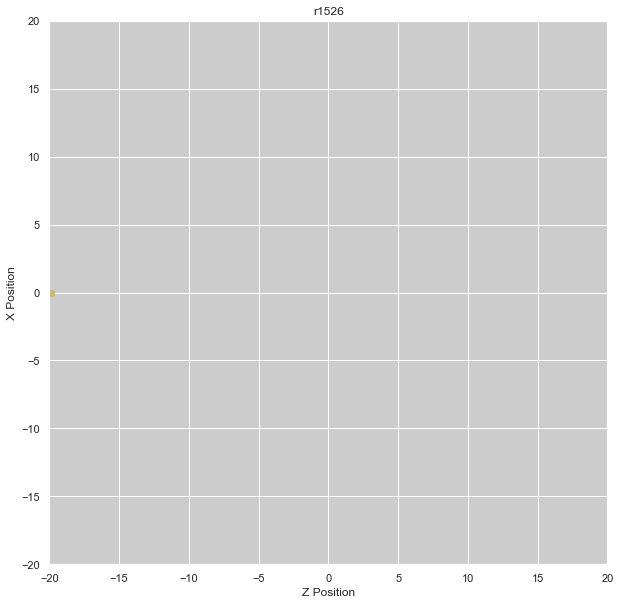

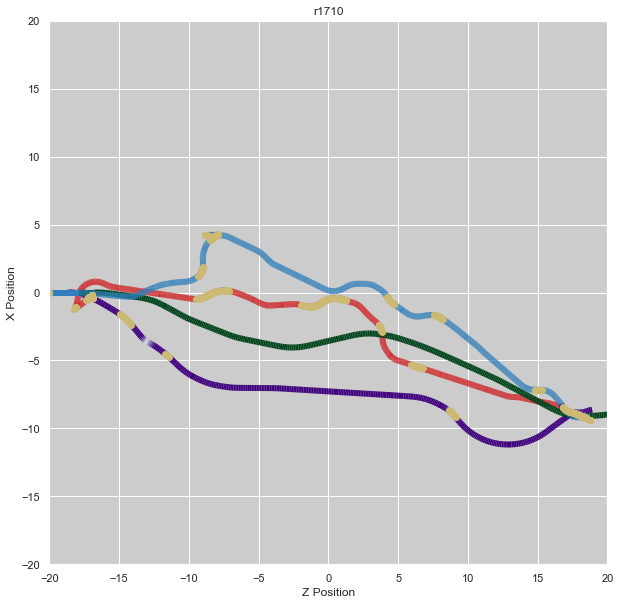

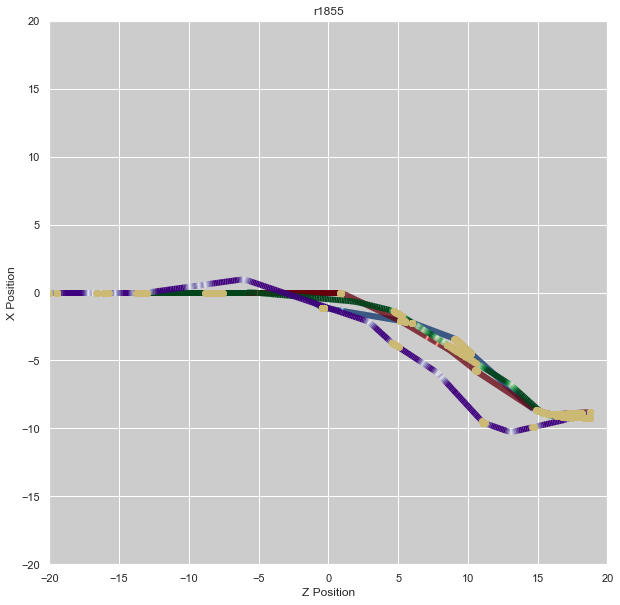

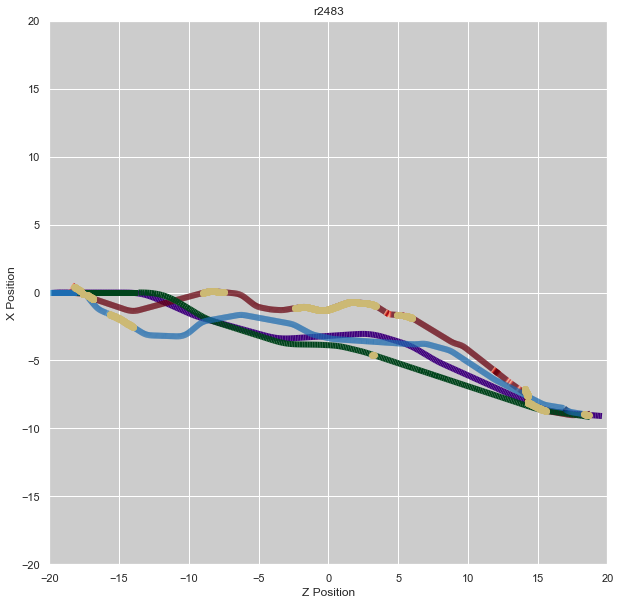

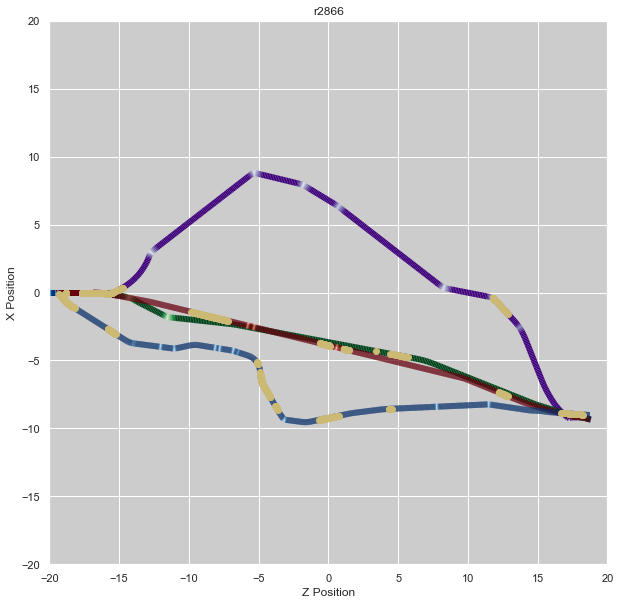

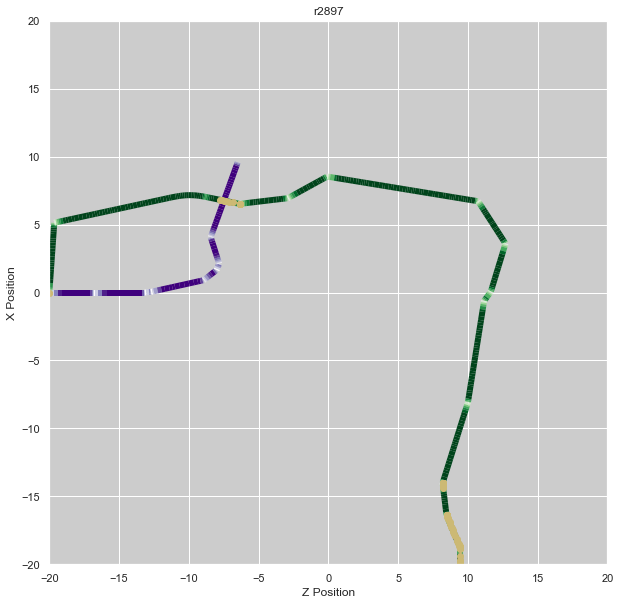

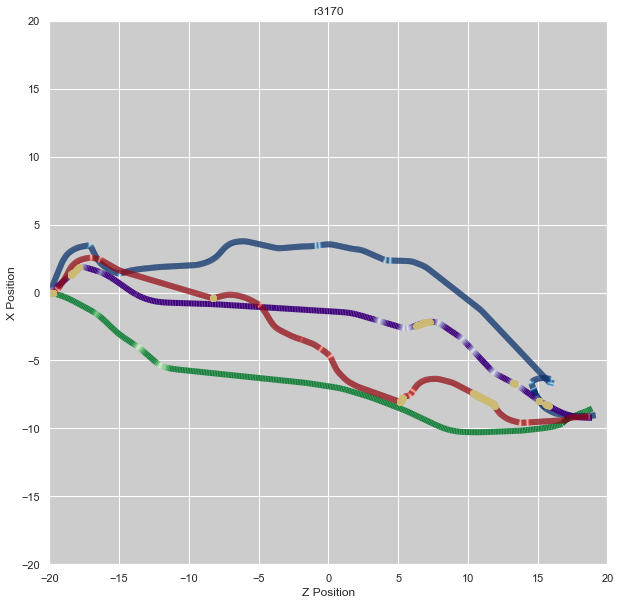

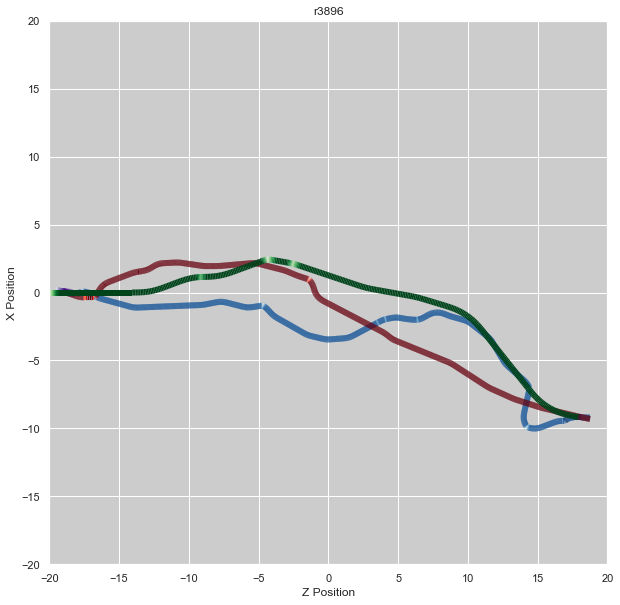

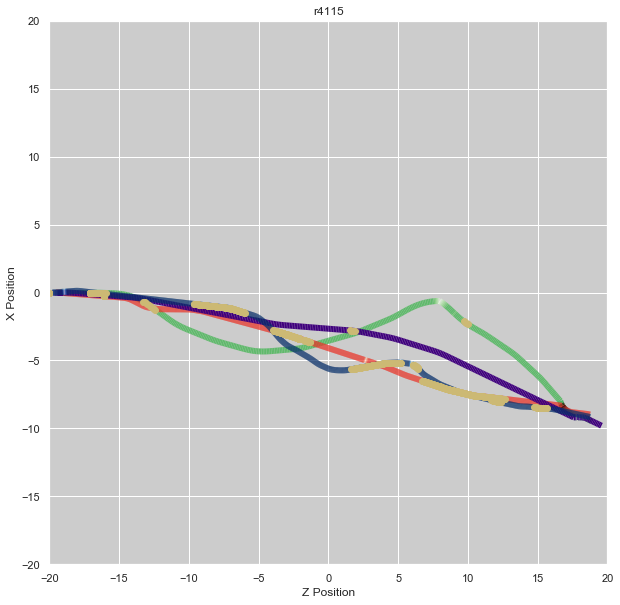

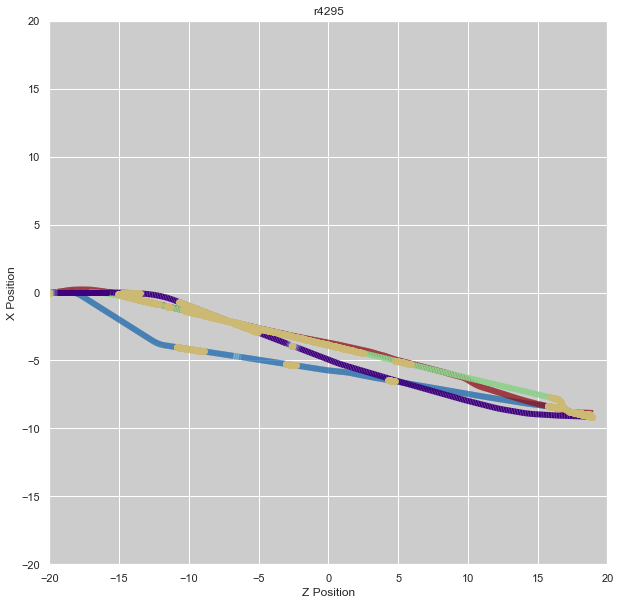

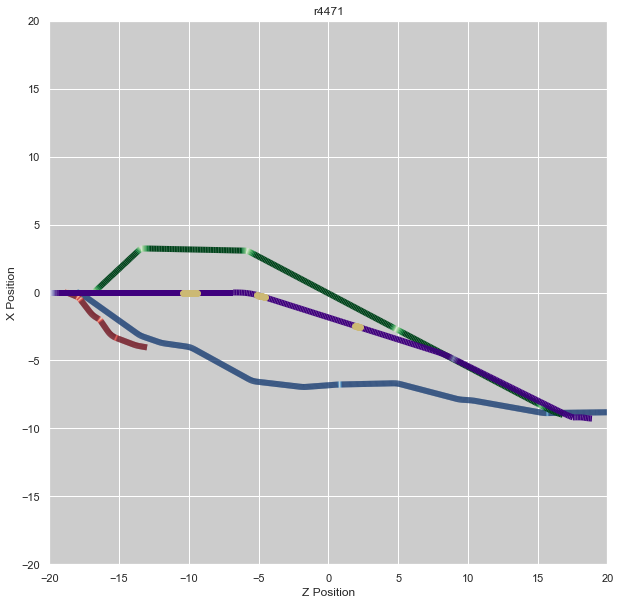

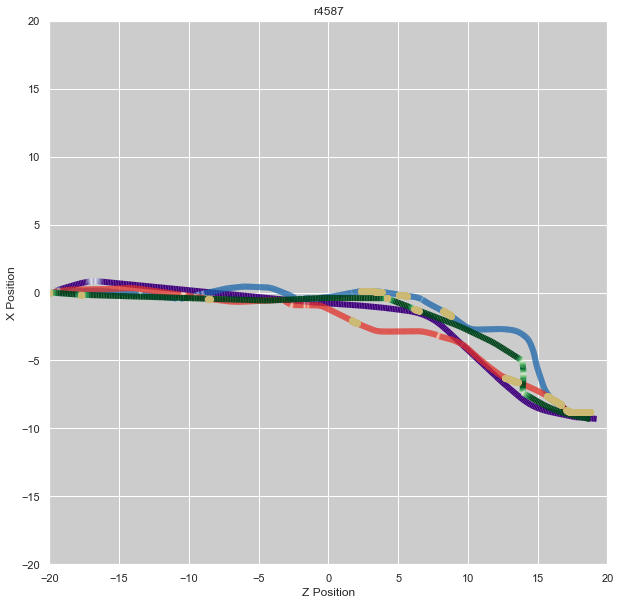

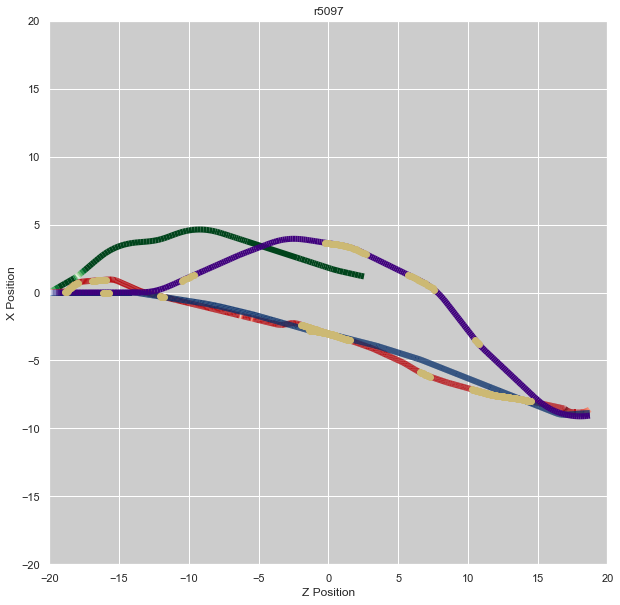

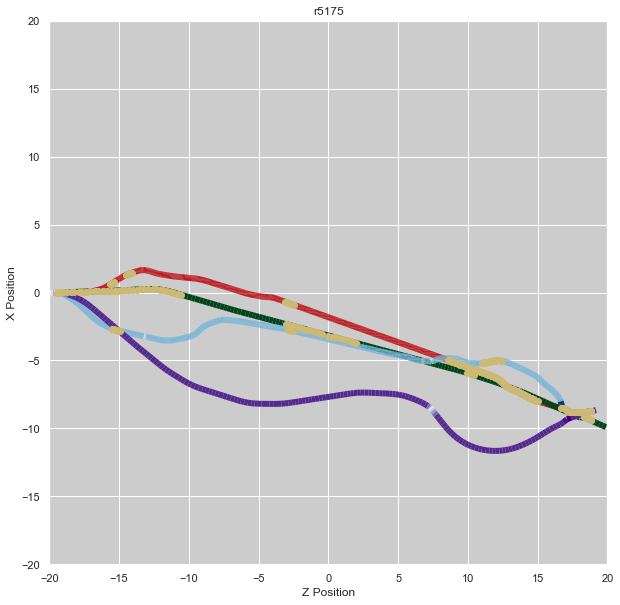

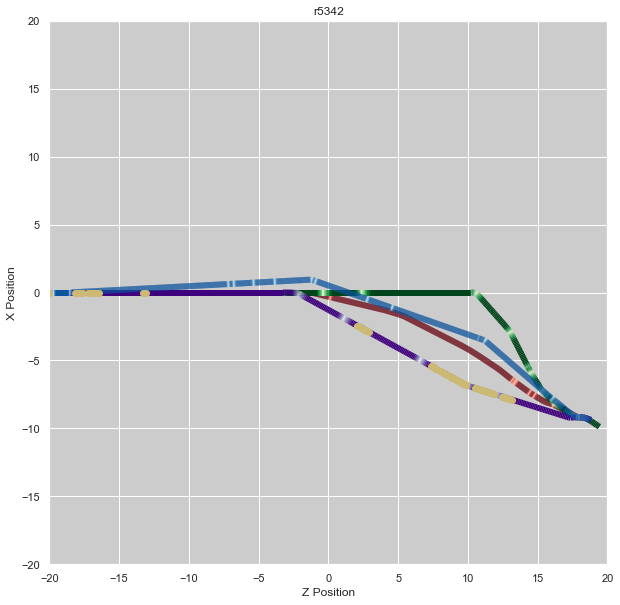

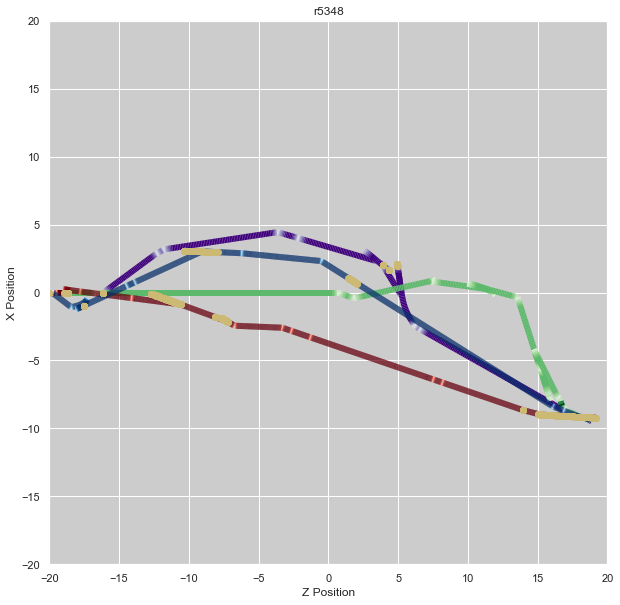

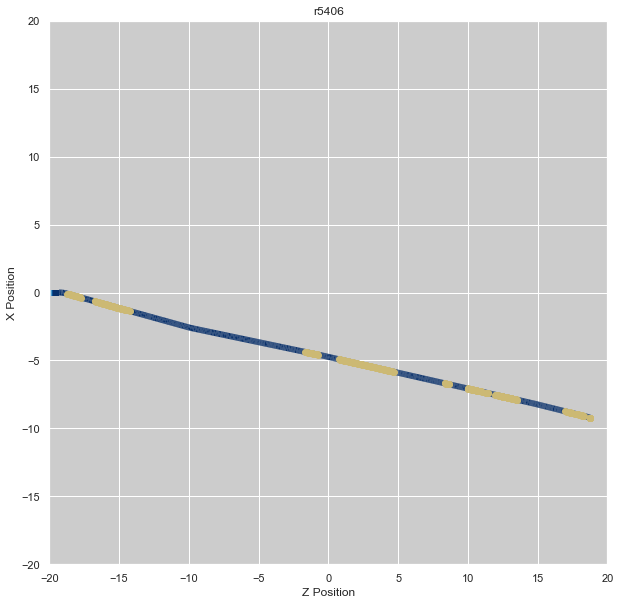

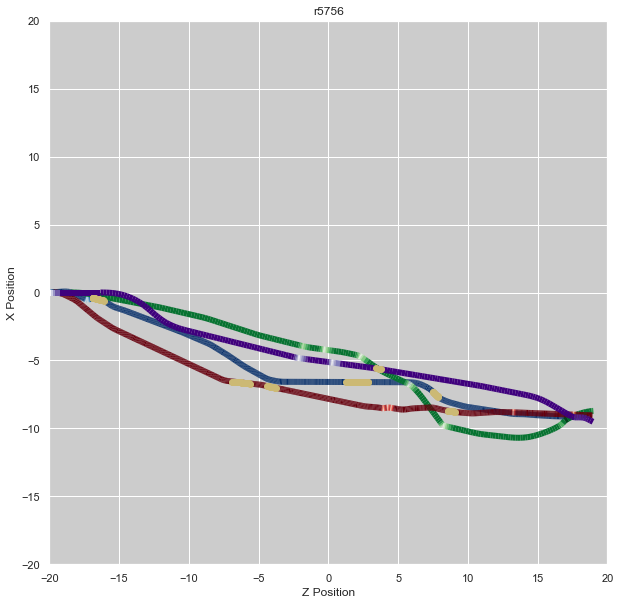

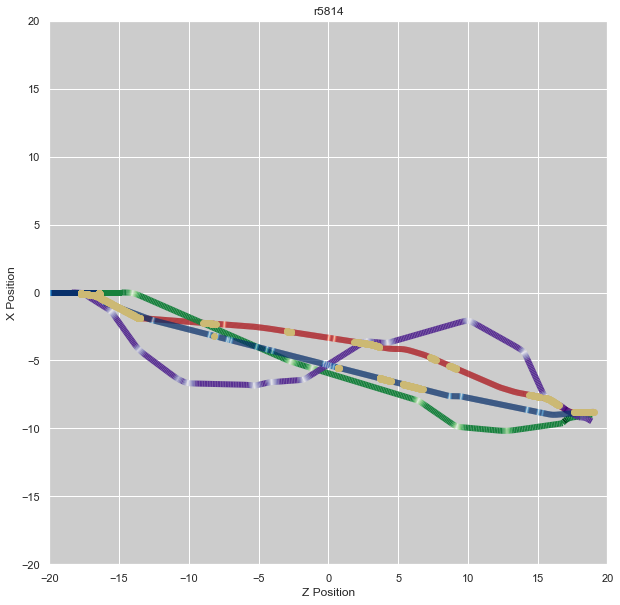

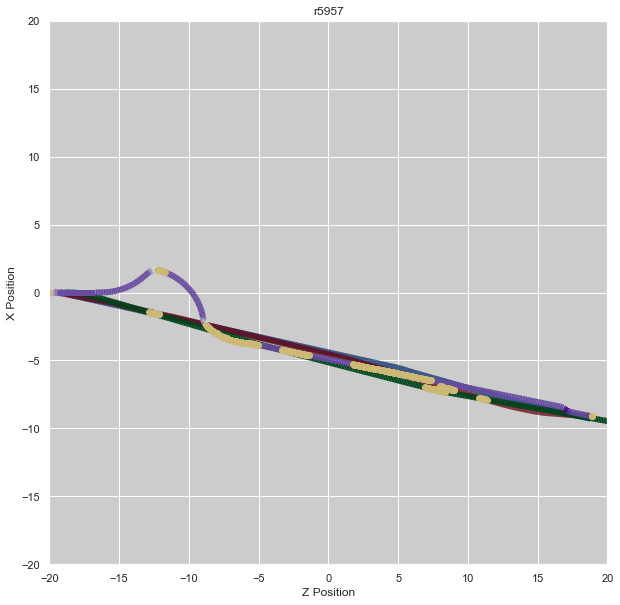

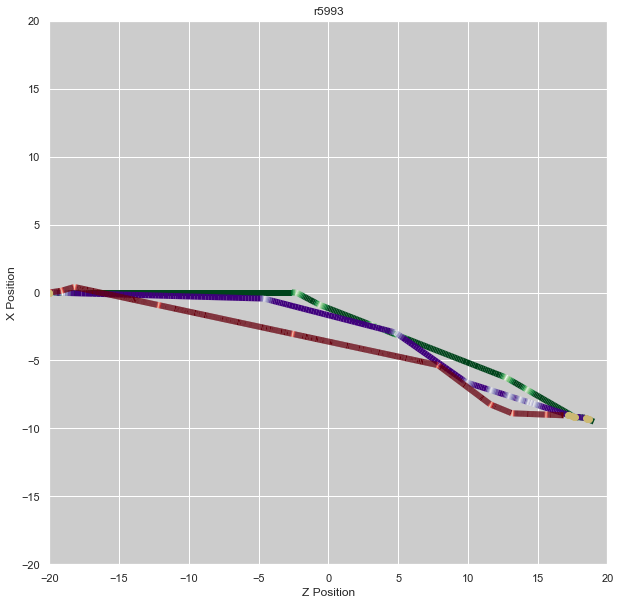

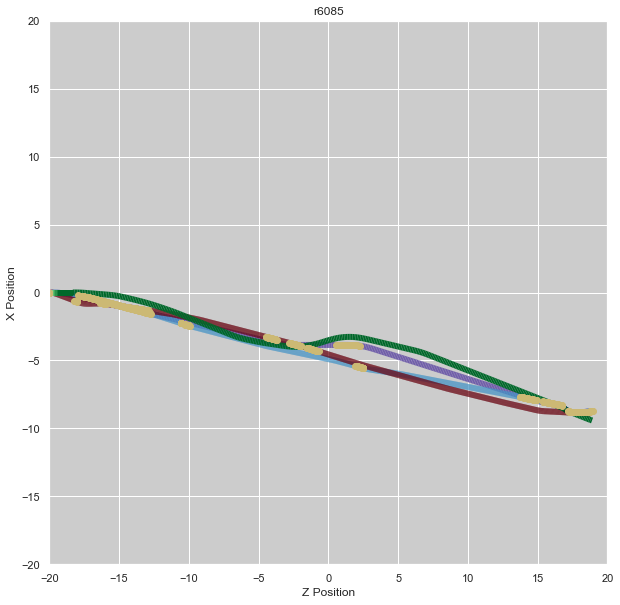

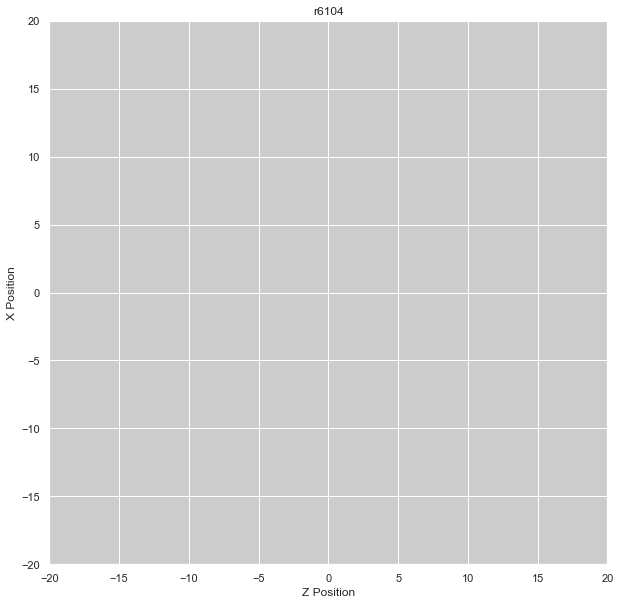

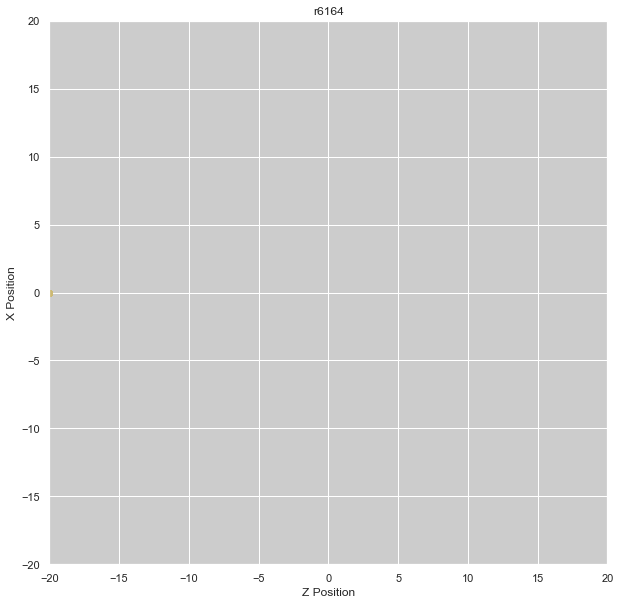

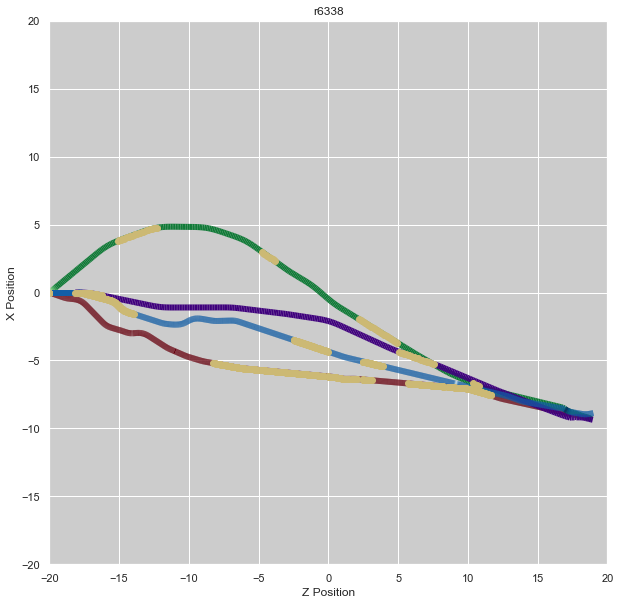

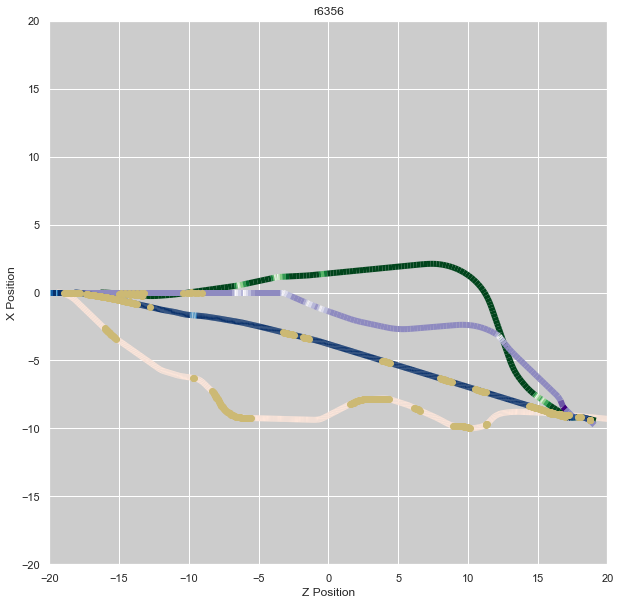

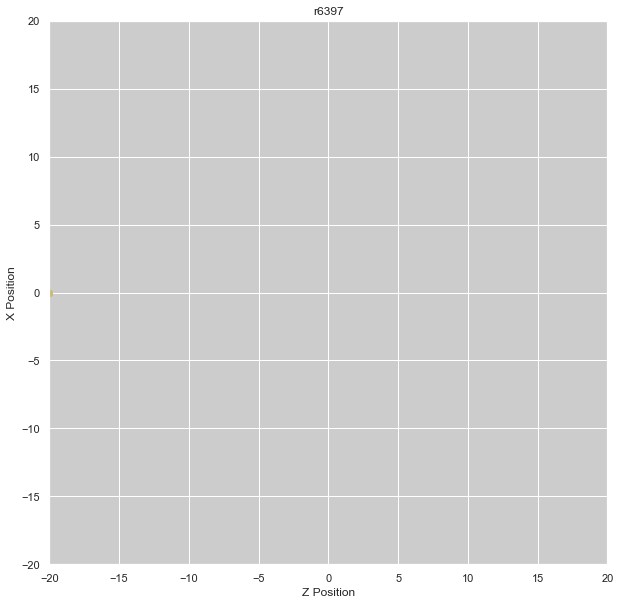

In [5]:
colors={(1,0) :'Reds', (1,3) : 'Greens', (3,0) : 'Blues', (3,3) : 'Purples'}
labels={(1,0) :'Low, Slow', (1,3) : 'Low, Fast', (3,0) : 'High, Slow', (3,3) : 'High, Fast'}
marker_color={(1,0) :'ro', (1,3) : 'go', (3,0) : 'bo', (3,3) : 'bo'}

orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]

# paths=runsDF[runsDF['id']=='r5814']
for part in runsDF.id.unique():
# title='r1489'
    paths=runsDF[runsDF['id']==part]
    title=part
    order= runsDF[runsDF['id']==part]['order'].iloc[0]
    fig, ax = plt.subplots()
    ax.set_facecolor("#CCCCCC")
    ax.set_title(title)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.set_xlabel("Z Position")
    ax.set_ylabel("X Position")
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])
# legend = list(legend_elements[orders[order]])
# ax.legend(handles=legend, loc='upper right', title='In order of play:')
    for path in paths.iterrows():
        condition=(path[1]['perspective'],path[1]['speed'])
        data=pd.read_csv(path[1]['path'])
        data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
        participant=data[data['i']==0]

        #color gradients
        points = np.array([participant['pz'], participant['px']]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(participant['speed'].min(), participant['speed'].max())
        lc = LineCollection(segments, cmap=colors[condition], norm=norm)

        lc.set_array(participant['speed'])
        lc.set_linewidth(6)
        line = ax.add_collection(lc)
        
                    ####IMPACTS
        chair_px=[]
        chair_pz=[]

        for row in data[data['i']==0].itertuples():
            pxs=[row.px]*76
            pzs=[row.pz]*76
            chair_px.extend(pxs)
            chair_pz.extend(pzs)
        if (len(chair_px)==data.shape[0]) & (len(chair_pz)==data.shape[0]):
            data['chair_px']=chair_px 
            data['chair_pz']=chair_pz
            data['chair_dist']= ((data['px']-data['chair_px'])**2 + (data['pz']-data['chair_pz'])**2)**(1/2)
            impacts=data[(data['chair_dist']<1.5) & (data['i']>0)]
            ax.plot(impacts['chair_pz'], impacts['chair_px'], 'yo')
#         fig.colorbar(line, label=labels[condition], aspect=40)

    #     ax.plot(participant['pz'], participant['px'], colors[condition], lw=3)
#     plt.savefig('player_figs/'+str(title)+'_gradient.png')
    plt.show()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


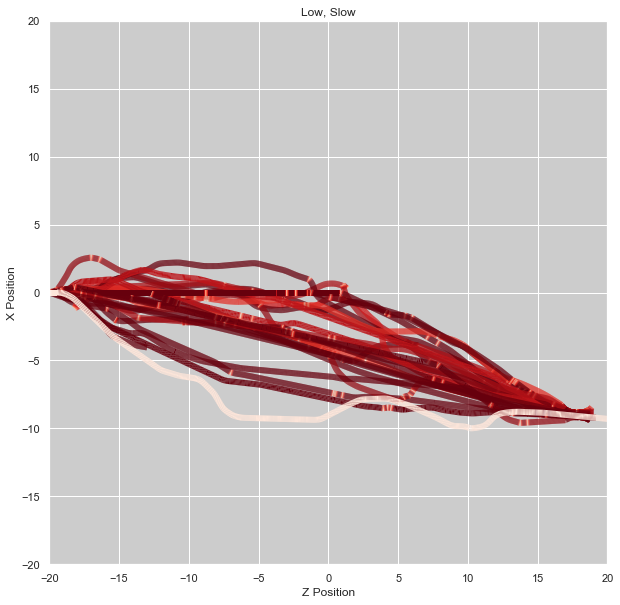

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


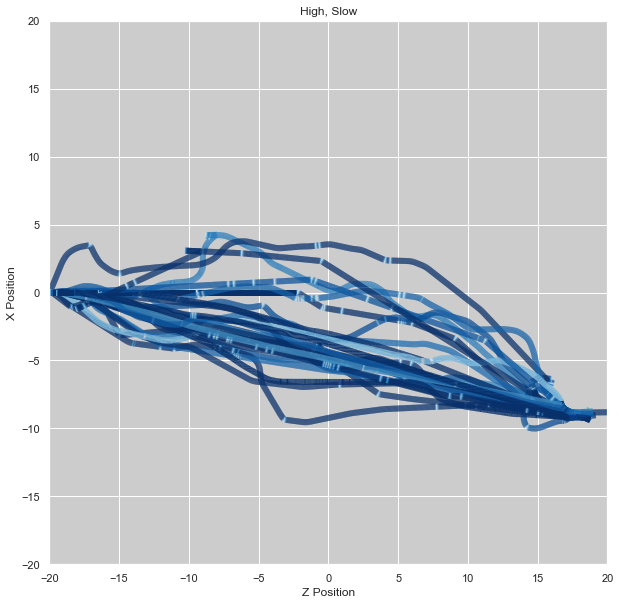

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


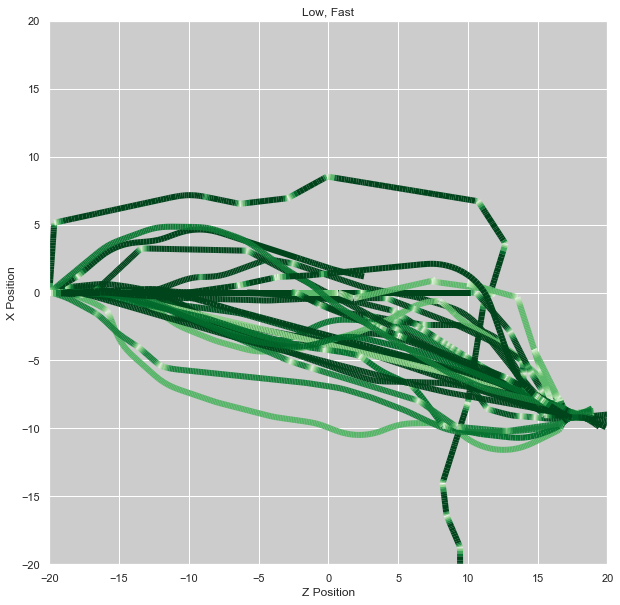

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


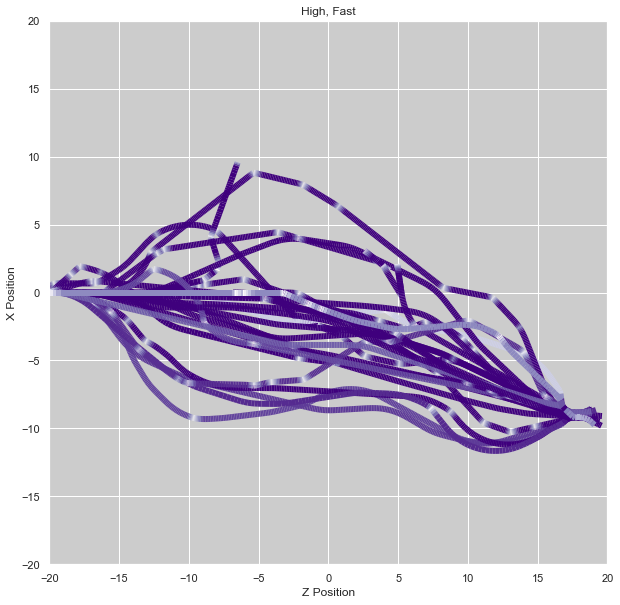

In [6]:
colors={(1,0) :'Reds', (1,3) : 'Greens', (3,0) : 'Blues', (3,3) : 'Purples'}
labels={(1,0) :'Low, Slow', (1,3) : 'Low, Fast', (3,0) : 'High, Slow', (3,3) : 'High, Fast'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]

for speed_i in (0, 3):
    for persp_i in (1, 3):        
        paths=runsDF[runsDF['perspective']==persp_i][runsDF['speed']==speed_i]
        title=labels[(persp_i, speed_i)]
        fig, ax = plt.subplots()
        ax.set_facecolor("#CCCCCC")
        ax.set_title(title)
        fig.set_figheight(10)
        fig.set_figwidth(10)
        ax.set_xlabel("Z Position")
        ax.set_ylabel("X Position")
        ax.set_xlim([-20,20])
        ax.set_ylim([-20,20])
#         legend_elements = [Line2D([0], [0], color='r', lw=3, label='Low, Slow'),\
#                            Line2D([0], [0], color='g', lw=3, label='Low, Fast'),\
#                            Line2D([0], [0], color='b', lw=3, label='High, Slow'),\
#                            Line2D([0], [0], color='y', lw=3, label='High, Fast')]
#         ax.legend(handles=legend_elements, loc='upper right')
        for path in paths.iterrows():
            condition=(path[1]['perspective'],path[1]['speed'])
            data=pd.read_csv(path[1]['path'])
            data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
            participant=data[data['i']==0]

            points = np.array([participant['pz'], participant['px']]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            norm = plt.Normalize(participant['speed'].min(), participant['speed'].max())
            lc = LineCollection(segments, cmap=colors[condition], norm=norm)

            lc.set_array(participant['speed'])
            lc.set_linewidth(6)
            line = ax.add_collection(lc)
            

            
        #     fig.colorbar(line, label=labels[condition], aspect=40)

        # plt.savefig('/Users/im/Documents/player_figs/'+str(title)+'.png')
        plt.show()

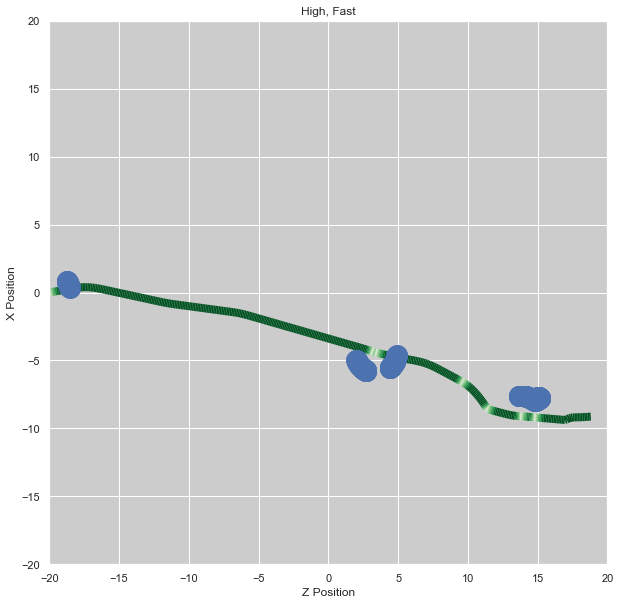

0.3390007019043004

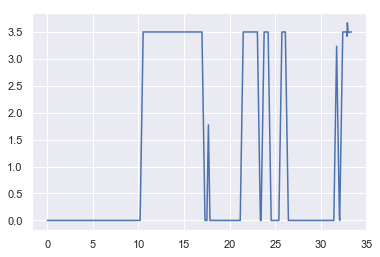

In [7]:
colors={(1,0) :'Reds', (1,3) : 'Greens', (3,0) : 'Blues', (3,3) : 'Purples'}
labels={(1,0) :'Low, Slow', (1,3) : 'Low, Fast', (3,0) : 'High, Slow', (3,3) : 'High, Fast'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]

paths=runsDF[runsDF['id']=='r1376']
# for body in range(1,76):
#     print(body)
fig, ax = plt.subplots()
ax.set_facecolor("#CCCCCC")
ax.set_title(title)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_xlabel("Z Position")
ax.set_ylabel("X Position")
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
# legend = list(legend_elements[orders[order]])
# ax.legend(handles=legend, loc='upper right', title='In order of play:')
path=paths.iloc[[0]]
# condition=(path[1]['perspective'],path[1]['speed'])
# data=pd.read_csv(path[1]['path'])
condition=(path['perspective'].iloc[0],path['speed'].iloc[0])
data=pd.read_csv(path['path'].iloc[0])

data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
chair_px=[]
chair_pz=[]

for row in data[data['i']==0].itertuples():
    pxs=[row.px]*76
    pzs=[row.pz]*76
    chair_px.extend(pxs)
    chair_pz.extend(pzs)
    
data['chair_px']=chair_px
data['chair_pz']=chair_pz
data['chair_dist']= ((data['px']-data['chair_px'])**2 + (data['pz']-data['chair_pz'])**2)**(1/2)


participant=data[data['i']==0]
impacts=data[(data['chair_dist']<1.5) & (data['i']>0) ]
ax.plot(impacts['pz'], impacts['px'], 'bo', markersize=20)
# #color gradients
points = np.array([participant['pz'], participant['px']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(participant['speed'].min(), participant['speed'].max())
lc = LineCollection(segments, cmap=colors[condition], norm=norm)

lc.set_array(participant['speed'])
lc.set_linewidth(8)
line = ax.add_collection(lc)
# ax.plot(data[data['i']==i]['pz'], data[data['i']==i]['px'], colors[condition], lw=3)
plt.show()
# ax.plot(data[data['i']==i]['pz'], data[data['i']==i]['px'])

impact_times=tuple(data[(data['chair_dist']<1.5) & (data['i']>0)]['t'])
data['impacted']=0

data.loc[data['t'].isin(impact_times), 'impacted'] = 1
data['impacted_shifts']=data['impacted'].diff().abs()
b=data[(data['i']==0) & (data['impacted_shifts']==1)].t.diff().iloc[1::2]


data['moving'] = data['speed'].apply(lambda x: 0 if x == 0 else 1)
data['speed_shifts']=data['moving'].diff().abs()
a=data[(data['i']==0) & (data['speed_shifts']==1)].t.diff().iloc[1::2]
a=a[a>.045]


plt.plot(data[data['i']==0]['t'], data[data['i']==0]['speed'])
# plt.plot(data[data['i']==0]['t'], data[data['i']==0]['moving'])
a.iloc[0]

In [8]:
userData=pd.read_csv('./Be The Chair_September 18, 2019_13.43.csv')
userData = userData.replace('NAN', np.nan)
userData['id']=userData['Q15'].str.split('-')
userData.rename(columns={'Q1': 'age',
                          'Q2': 'gender',
                          'Q3': 'videogames',
                          'Q7_2_TEXT': 'started_driving',
                          'Q12': 'high_level_approach',
                          'Q14': 'faster'
                         }, inplace=True)

# expand df.tags into its own dataframe
ids = userData['id'].apply(pd.Series)

# rename each variable is tags
ids = ids.rename(columns = lambda x : 'id_' + str(x))

# view the tags dataframe
ids['id_1'] = ids['id_1'].str.extract('(\d+)', expand=False).str.slice(start=0, stop=4)
userData['id_val']=ids['id_1']
userData.dropna(subset=['id_val', 'age', 'gender'], inplace=True)
shared=set(runsDF['id'].str.extract('(\d+)', expand=False).unique()).intersection(set(userData['id_val'].unique()))
users_all=userData[userData['id_val'].isin(shared)]

In [9]:
impacts_data=[]
paths=None
for speed_i in (0, 3):
    for persp_i in (1, 3):        
        paths=runsDF[runsDF['perspective']==persp_i][runsDF['speed']==speed_i]
        for path in paths.iterrows():
            info={}
            condition=(path[1]['perspective'],path[1]['speed'])
            userID=path[1]['id_val']
            data=pd.read_csv(path[1]['path'])
            data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
            data['chair_px']=data['t'].map(data[data['i']==0][['px', 't']].set_index('t')['px'])
            data['chair_pz']=data['t'].map(data[data['i']==0][['pz', 't']].set_index('t')['pz'])

#             if (len(chair_px)==data.shape[0]) & (len(chair_pz)==data.shape[0]):
#                 data['chair_px']=chair_px 
#                 data['chair_pz']=chair_pz
            data['chair_dist']= ((data['px']-data['chair_px'])**2 + (data['pz']-data['chair_pz'])**2)**(1/2)

            impact_times=tuple(data[(data['chair_dist']<1.5) & (data['i']>0)]['t'])
            data['impacted']=0

            data.loc[data['t'].isin(impact_times), 'impacted'] = 1
            data['impacted_shifts']=data['impacted'].diff().abs()
            impact_timings=data[(data['i']==0) & (data['impacted_shifts']==1)].t.diff().iloc[1::2]
            info['impacts']=len(impact_timings)
            info['time in impacts']=np.sum(impact_timings)
            info['perspective']=persp_i
            info['speed']=speed_i
            info['total time']= data.iloc[-1]['t']
            info['condition']=condition
            info['label']=labels[condition]
            info['path']=path[1]['path']

            data['moving'] = data['speed'].apply(lambda x: 0 if x == 0 else 1)
            data['speed_shifts']=data['moving'].diff().abs()
            stop_timings=data[(data['i']==0) & (data['speed_shifts']==1)].t.diff().iloc[1::2]
            stop_timings=stop_timings[stop_timings>.06]

            info['stops']=len(stop_timings)
            info['time stopped']= np.sum(stop_timings)
            if len(stop_timings) >0:   
                info['first stop']=stop_timings.iloc[0]
            else:
                info['first stop']=0
            
            user_info=users_all[users_all['id_val']==userID]
            if userID in shared:
                if user_info.shape[0]>0:
                    info['age']=int(user_info['age'].values[0]) 
                    info['gender']=user_info['gender'].values[0]
                    info['videogames']=user_info['videogames'].values[0]
                    info['started_driving']= user_info['started_driving'].values[0]

            impacts_data.append(info)    
            
impactsDF=pd.DataFrame(impacts_data)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [10]:
impactsDF['normalized time in impact']=impactsDF['time in impacts']/impactsDF['total time']
impactsDF['started_driving'].fillna(impactsDF['age'], inplace=True)
impactsDF['started_driving']=impactsDF['started_driving'].astype(float)
impactsDF['years of driving']=impactsDF['age']-impactsDF['started_driving']
impactsDF

,age,condition,first stop,gender,impacts,label,path,perspective,speed,started_driving,stops,time in impacts,time stopped,total time,videogames,normalized time in impact,years of driving
0,23.0,"(1, 0)",0.000000,Male,8,"Low, Slow",production-run-911/r10606113.csv,1,0,16.0,0,9.200446,0.000000,48.372250,I play video games about once a week,0.190201,7.0
1,32.0,"(1, 0)",2.678630,Male,9,"Low, Slow",production-run-911/r11135745.csv,1,0,16.0,9,14.126704,24.047332,65.299278,I play video games several times a week,0.216338,16.0
2,33.0,"(1, 0)",15.191230,Male,9,"Low, Slow",production-run-911/r12160497.csv,1,0,18.0,4,14.914301,16.788812,47.428574,I play video games several times a week,0.314458,15.0
3,32.0,"(1, 0)",0.000000,Female,4,"Low, Slow",production-run-911/r13762289.csv,1,0,20.0,0,2.730001,0.000000,44.028000,I play video games several times a week,0.062006,12.0
4,43.0,"(1, 0)",0.100000,Male,6,"Low, Slow",production-run-911/r14895761.csv,1,0,18.0,2,6.983422,10.129545,61.711956,I play video games several times a week,0.113162,25.0
5,NaN,"(1, 0)",0.100000,NaN,2,"Low, Slow",production-run-911/r15267553.csv,1,0,NaN,112,1.948474,8.666107,56.826977,NaN,0.034288,NaN
6,43.0,"(1, 0)",1.162360,Male,11,"Low, Slow",production-run-911/r17106113.csv,1,0,15.0,6,12.085580,5.610834,53.431786,I occasionally play video games,0.226187,28.0
7,53.0,"(1, 0)",0.063215,Female,4,"Low, Slow",production-run-911/r18559809.csv,1,0,16.0,11,3.887216,25.688441,62.127354,I occasionally play video games,0.062569,37.0
8,58.0,"(1, 0)",0.100000,Male,10,"Low, Slow",production-run-911/r24834593.csv,1,0,16.0,12,17.297376,21.372839,69.587288,I play video games several times a week,0.248571,42.0
9,38.0,"(1, 0)",0.801001,Female,6,"Low, Slow",production-run-911/r2866817.csv,1,0,16.0,4,11.038999,19.845999,56.362999,I play video games about once a week,0.195855,22.0


In [11]:
users_all=userData[userData['id_val'].isin(shared)]


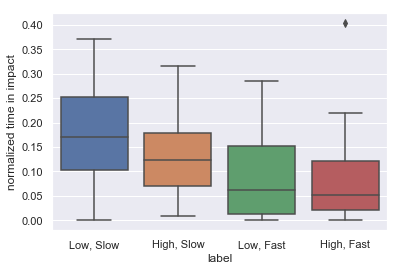

In [12]:

sns.boxplot(x='label', y='normalized time in impact', data=impactsDF)


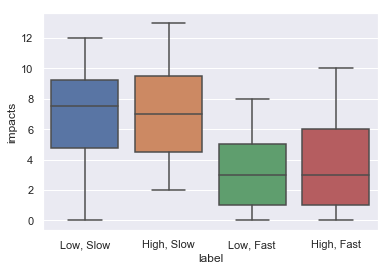

In [13]:
sns.boxplot(x='label', y='impacts', data=impactsDF, showfliers=False)

104


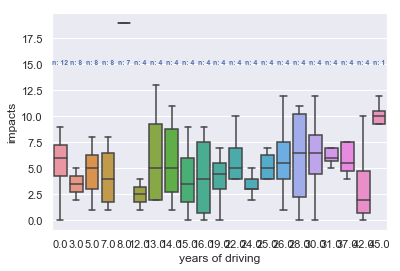

In [14]:
a=sns.boxplot(x='years of driving', y='impacts', data=impactsDF, showfliers=False)
medians = impactsDF.groupby(['years of driving'])['impacts'].median().values
nobs = impactsDF['years of driving'].value_counts().values
print(sum(nobs))
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# # Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,a.get_xticklabels()):
    a.text(pos[tick], 15, nobs[tick], horizontalalignment='center', size='x-small', color='b', weight='semibold')

# # a.set_xticklabels(a.get_xticklabels(), fontsize=14, )

104


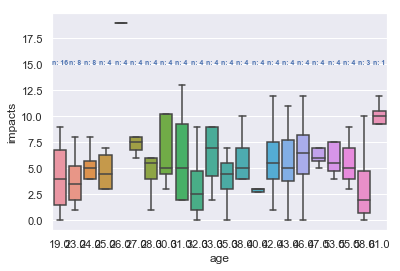

In [15]:
a=sns.boxplot(x='age', y='impacts', data=impactsDF, showfliers=False)
medians = impactsDF.groupby(['age'])['impacts'].median().values
nobs = impactsDF['age'].value_counts().values
print(sum(nobs))
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# # Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,a.get_xticklabels()):
    a.text(pos[tick], 15, nobs[tick], horizontalalignment='center', size='x-small', color='b', weight='semibold')

# # a.set_xticklabels(a.get_xticklabels(), fontsize=14, )

104


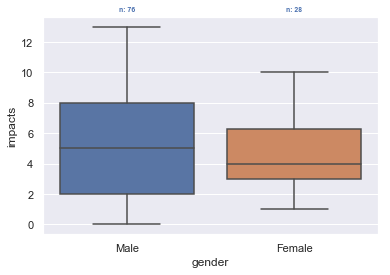

In [16]:
a=sns.boxplot(x='gender', y='impacts', data=impactsDF, showfliers=False)
medians = impactsDF.groupby(['gender'])['impacts'].median().values

nobs = impactsDF['gender'].value_counts().values
print(sum(nobs))
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# # Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,a.get_xticklabels()):
    a.text(pos[tick], 14, nobs[tick], horizontalalignment='center', size='x-small', color='b', weight='semibold')

# # a.set_xticklabels(a.get_xticklabels(), fontsize=14, )

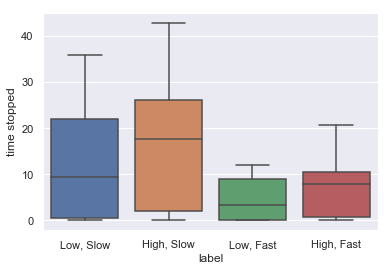

In [17]:
sns.boxplot(x='label', y='time stopped', data=impactsDF, showfliers=False)

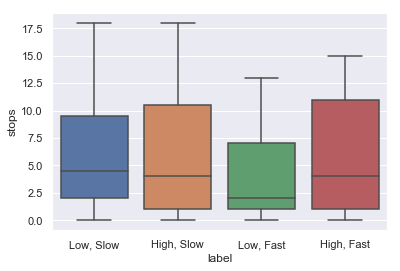

In [18]:
sns.boxplot(x='label', y='stops', data=impactsDF, showfliers=False)

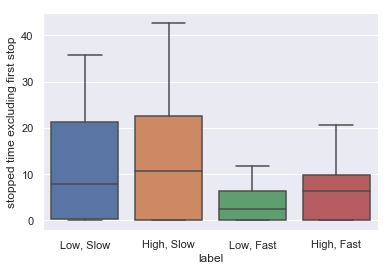

In [19]:
impactsDF['stopped time excluding first stop']=impactsDF['time stopped']-impactsDF['first stop']
sns.boxplot(x='label', y='stopped time excluding first stop', data=impactsDF, showfliers=False)

In [186]:
feedback=pd.read_csv('Be The Chair Feedback_September 19, 2019_11.20.csv')
feedback.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage'], inplace=True)
questions=feedback.iloc[0].to_dict()
feedback.drop([0,1,2], inplace=True)
feedback.loc[:,feedback.columns.str.contains('_')]=feedback.loc[:,feedback.columns.str.contains('_')].astype(float)

In [215]:
blocks={'r2866831' :  ['Q44', 'Q45', 'Q46_1', 'Q46_2', 'Q46_3', 'Q46_4', 'Q46_5', 'Q46_6', 'Q46_7'],
        'r12160497' : ['Q11', 'Q15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7'],
        'r13762303' : ['Q20', 'Q21', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4', 'Q22_5', 'Q22_6', 'Q22_7'],
        'r13762301' : ['Q17', 'Q18', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7'],
        'r17106113' : ['Q32', 'Q33', 'Q34_1', 'Q34_2', 'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_7'],
        'r17106115' : ['Q23', 'Q24', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7'],
        'r24834607' : ['Q38', 'Q39', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5', 'Q40_6', 'Q40_7'],
        'r17106125' : ['Q26', 'Q27', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7'],
        'r17106127' : ['Q35', 'Q36', 'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7'],
        'r18559823': ['Q29',  'Q30', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6', 'Q31_7'],
       }
likert_values={
        0: "",
        8: 'Strongly Disagree', 
        9 : 'Disagree',
        10 : 'Somewhat Disagree', 
        11: 'Neither Agree nor Disagree',
        12: 'Somewhat Agree',
        13: 'Agree',
        14: 'Strongly Agree',
        15: ""}

likert_questions={'_1':'I would have liked for the chair to move more slowly',
                  '_2':'I would have liked for the chair to stop for people more',
                  '_3':'I understood where the chair was trying to go',
                  '_4': 'The people in the space were aware of the chair',
                  '_5': 'The chair’s motion was respectful of the people in the space',
                  '_6': 'The chair’s motion made it stand out among the crowd',
                  '_7': 'The chair should have moved more like a person would'
                  }

condition={'r12160497':'Low, Slow',
           'r13762301':'Low, Fast',
           'r13762303':'High, Fast',
           'r17106115':'High, Slow',
           'r17106113':'Low, Slow',
           'r17106125':'Low, Fast',
           'r17106127':'High,Fast',
           'r18559823':'High, Fast',
           'r24834607':'High, Fast',
           'r2866819':'High, Slow',
           'r2866831':'High, Fast'
          }
           
           
           
           
           

In [189]:
dfs=[]
df=None
for run in blocks.keys():
    df=feedback[blocks[run]].loc[:,feedback[blocks[run]].columns.str.contains('_')]
    df=df.rename(columns=dict(zip(df.columns,likert_questions.keys())))
    df.dropna(how='all', inplace=True)
    df=df.astype(int)
    df['label']=run
    dfs.append(df)
    
combined=pd.concat(dfs)
combined.head()

,_1,_2,_3,_4,_5,_6,_7,label
3,11,11,11,11,11,11,11,r2866831
4,9,12,11,11,12,10,11,r2866831
7,9,9,13,12,14,9,13,r2866831
8,11,11,9,12,13,12,11,r2866831
10,10,10,11,12,13,13,13,r2866831


<a list of 10 Text xticklabel objects>


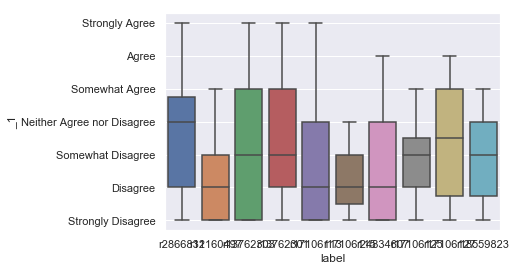

<a list of 10 Text xticklabel objects>


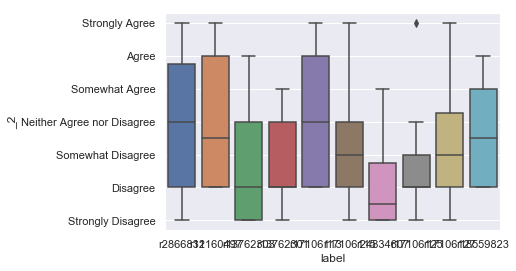

<a list of 10 Text xticklabel objects>


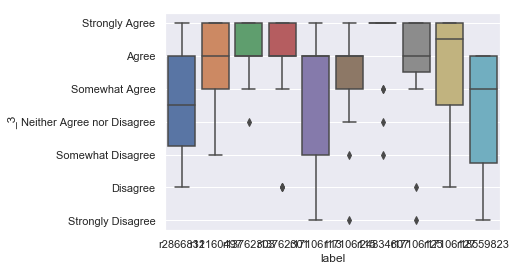

<a list of 10 Text xticklabel objects>


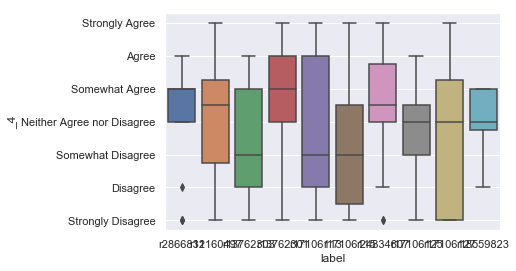

<a list of 10 Text xticklabel objects>


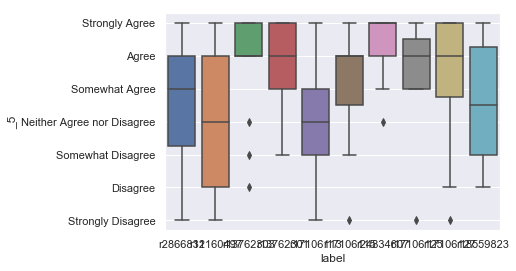

<a list of 10 Text xticklabel objects>


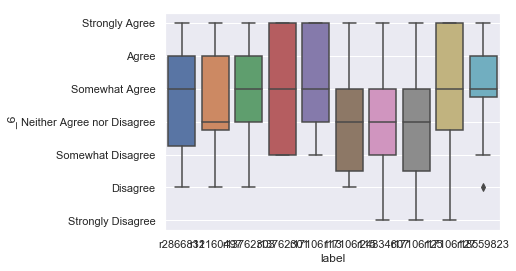

<a list of 10 Text xticklabel objects>


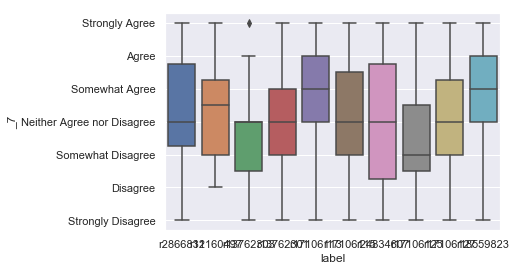

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [220]:
combined.label.unique()
for q in combined.columns:
    a = sns.boxplot(x='label', y=q, data=combined)
    a.set_xticklabels(, fontsize=14, rotation=80)
    a.set_yticklabels(labels=["",'Strongly Disagree', 'Disagree','Somewhat Disagree', 'Neither Agree nor Disagree','Somewhat Agree','Agree','Strongly Agree', ""])
    print(a.get_xticklabels())
    plt.show()

TODO:
    

In [98]:
dict(zip(test.columns,likert_questions.keys()))

{'Q34_1': '_1',
 'Q34_2': '_2',
 'Q34_3': '_3',
 'Q34_4': '_4',
 'Q34_5': '_5',
 'Q34_6': '_6',
 'Q34_7': '_7'}